### Table of Contents

- 1. Introduction

- 2. Data collection
    * 2.1 Import packages
    * 2.2 Import and treat data  
    * 2.3 Finalize Delhi air quality and Cities air quality datasets 

- 3. Exploratory Data Analysis
    * 3.1 Handle missing value
    * 3.2 Visualization
	* 3.2.1 Delhi AQI
	* 3.2.2 Delhi meteorological factors
	* 3.2.3 Delhi polutant substance
	* 3.2.3 Cities's air quality
	* 3.2.3 Delhi AQI
	* 3.2.3 Delhi AQI	
    * 3.3 Correlation
        
- 4. Modelling Preparation
    * 4.1 Treat outliers
    * 4.2 Feature selection  
    * 4.3 Finalize train-test data
    * 4.4 Normalization

        
- 5. Modelling
    * 5.1 Regression:
        * 5.1.1 Linear regression model
        * 5.1.2 Polynomial regression model
	* 5.1.3 Support vector regression model
	* 5.1.4 Decission tree regression model
	* 5.1.5 K-Nearest Neighbour regression model:
    * 5.2 Regression validation:
	* 5.2.1 Plotting comparision of actual and predicted values different regression machine learning models
        * 5.2.2 R2 Cross validation
	* 5.2.3 Hyperparameter Tuning

    * 5.3 Time series:
	* 5.3.1 Train test preparation
        * 5.3.2 Check stationarity and transforming
	* 5.3.3 Prophet model
	* 5.3.4 VAR model

- 5. Conclusion

# 1. Introduction

According to a study by the World Health Organization (WHO), air pollution is responsible for 7 million deaths each year globally. India in recent years has often appeared on foreign and domestic newspapers about air pollution exceeding alarming levels. We can even see the level of air pollution in some of India’s cities with the naked eye, especially the captital of India, the city Delhi. As the capital of a second populated country in the world, Delhi attracts not only people from across India but also people from around the world. Along with dense population are traffic density, construction sites and heavy factories constantly springing up, making Delhi and other Indian cities's air pollution very heavy.

It is necessary to monitor the quality of air to protect people from respiratory disease. The goal of this challenge is to analyze the problem and predict the air quality from the data collected which includes pollutant substances indexes like SO2, CO2, etc and metrological factors like temperature, pressure, and relative humidity.

# 2. Data Collection
## 2.1 Import package



In [943]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import folium
import statsmodels.api as sm
from datetime import datetime

from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

##  2.2 Import data

There are 3 set of datasets being used for this notebook. 
1. **Air quality dataset (1)** includes daily information about air quality substance as well as the AQI (Air Quality Index) and AQI_Bucket (Air Quality Index Bucket) for 26 cities of India from 2015 to 2020.


2. **Temperature dataset of Delhi (2)** includes temperature, humidity, wind speed and wind direction from 2015 to 2021 of Delhi city only.


3. **Temperature dataset of 6 other cities (3)** includes 6 different datasets of different cities in India in the first 14 days of October from 2018 to 2021. There are 6 cities with 6 different dataset. 


The idea is to merge Air quality dataset (1) and temperature dataset of Delhi (2) to get the **Delhi Air Quality** dataset that include pollutant substance variables and metrological factor variables of Delhi from 2015 to 2020. This dataset will later be treated as **Training dataset** for modelling.

The Temperature dataset of 6 other cities (3) will be mearged with Air quality dataset (1) to get a **Cities Air Quality** dataset that include pollutant substance variables and metrological factor variables of 6 different cities in India first 14 days of October from 2018 to 2021. This dataset will later be treated as **Testing dataset** for modelling.

### Import and treat Air Quality dataset (1) and Temperature dataset of Delhi (2)

In [944]:
air_quality = pd.read_csv(r'C:\Users\minhh\OneDrive\Desktop\ML\Challenge\Challenge 1\city_day.csv',sep=',')
weather = pd.read_csv(r'C:\Users\minhh\OneDrive\Desktop\ML\Challenge\Challenge 1\temperature_humidity_windspeed.csv', index_col=False)

Treat timestamp column:

In [945]:
air_quality['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in air_quality['Date']] #change date column from object to datetime column
weather=weather.drop(['Basel Temperature [1000 mb]','Basel Temperature [850 mb]'],axis=1)
weather['timestamp']=weather['timestamp'].str[:-5] #remove unnesessary part of text
weather=weather.groupby(['timestamp']).mean().reset_index() #take average number to get daily number
weather['timestamp'] = [datetime.strptime(x, '%Y%m%d') for x in weather['timestamp']] #change type of timestamp to datetime

In [946]:
weather.columns = ['Date', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Direction']
weather.head(5)

Date  Temperature   Humidity  Wind Speed  Wind Direction
0 2014-09-01    15.010529  75.791667   10.254874      278.939712
1 2014-09-02    15.223446  70.041667    7.277148       89.777444
2 2014-09-03    15.855112  73.833333    8.105221      136.870941
3 2014-09-04    19.156363  75.208333    4.957090      113.672247
4 2014-09-05    21.025112  67.958333    3.991971      193.070215

### Import and treat Cities Air Quality dataset (3)
First, have a overall look at one of the weather set of dataset from Chennai:

In [947]:
Chennai_weather = pd.read_csv(r'C:\Users\minhh\OneDrive\Desktop\ML\Challenge\Challenge 1\weather_data\Chennai_weather.csv', header=None)
Chennai_weather

0            1                    2                  3  \
0          location      Chennai              Chennai            Chennai   
1               lat     13.06744             13.06744           13.06744   
2               lon     80.25395             80.25395           80.25395   
3               asl        8.800                8.800              8.800   
4          variable  Temperature  Precipitation Total  Relative Humidity   
...             ...          ...                  ...                ...   
1349  20181013T1900      28.8362                  0.0               79.0   
1350  20181013T2000      28.6162                  0.0               82.0   
1351  20181013T2100      28.3762                  0.0               85.0   
1352  20181013T2200      28.3962                  0.0               85.0   
1353  20181013T2300      28.2662                  0.0               85.0   

                            4           5          6  
0                     Chennai     Chennai    Chennai  
1                    13.06744    13.06744   13.06744  
2                    80.25395    80.25395   80.25395  
3                       8.800       8.800      8.800  
4     Mean Sea Level Pressure  Wind Speed  Wind Gust  
...                       ...         ...        ...  
1349                   1010.2   23.143827  23.039999  
1350                   1010.7   23.688984      24.48  
1351                   1011.1   24.627787      26.28  
1352                   1011.1   24.858253       27.0  
1353                   1011.0   25.006397      24.48  

[1354 rows x 7 columns]

#### Create a function to import 6 datasets from 6 cities and clean them
The next step is to import 6 dataset at a time, then treat it by using loop function. The example dataset above suggests that the cleaning steps should include:
- Get the city,longtitude,latitude from the rows and make it into one separate column
- Select 4th rows to be the header
- Remove unnessesary rows and unnessesary part of text in time column 
- Calculate average by date to get daily measurement
- Change data type

In [948]:
weather_file = glob.glob('C:/Users/minhh/OneDrive/Desktop/ML/Challenge/Challenge 1/weather_data' + "\*.csv")

#read csv files in a folder
for file in weather_file:
    df_nav=pd.read_csv(file,header = None)
    df_holding=pd.read_csv(file,header = None)
    
#append the files into different dataframe in order to treat it separately before merging it into one  
dfs = []
for file in weather_file:
    df = pd.read_csv(file,header = None)
    dfs.append(df)
    
#treat each of the dataframe  
for i in range(len(dfs)):
    loc_lon_lat = dfs[i].iloc[:3,0:2].set_index(0).transpose().reset_index().drop('index',axis=1) #slice first 3 rows to get the location and its long titude and latitude    
    dfs[i].columns = dfs[i].iloc[4] #select 4th rows to be the dataframe's header  
    dfs[i] = dfs[i].iloc[10:].reset_index().drop('index',axis=1) #remove unnecessary rows 
    dfs[i]['variable']=dfs[i]['variable'].str[:-5] #remove unnesessary part of text
    cols = dfs[i].columns.drop(['variable']) #change columns type
    dfs[i][cols] = dfs[i][cols].apply(pd.to_numeric, errors='coerce')
    dfs[i]=dfs[i].groupby(['variable']).mean().reset_index() #take average number to get daily number
    dfs[i]['variable'] = [datetime.strptime(x, '%Y%m%d') for x in dfs[i]['variable']] #change type of timestamp to datetime    
    dfs[i] = pd.concat([dfs[i], loc_lon_lat], axis=1).ffill(axis ='rows') #add location, longtitude and latitide column to the dataset
    dfs[i] = dfs[i].rename(columns={'variable': 'Date','location':'City', 'Precipitation Total':'Precipitation','Relative Humidity':'Humidity','Mean Sea Level Pressure':'Sea Level Pressure',}) #rename datetime column

# merge different dataframe of different cities together
weather_cities = pd.concat(dfs, ignore_index=True)
weather_cities.head(10)

Date  Temperature  Precipitation   Humidity  Sea Level Pressure  \
0 2018-09-30    33.096933            0.0  31.458333         1009.250000   
1 2018-10-01    33.267767            0.0  31.333333         1008.904167   
2 2018-10-02    33.601100            0.0  32.791667         1009.104167   
3 2018-10-03    33.276934            0.0  38.166667         1008.700000   
4 2018-10-04    33.169017            0.0  42.208333         1009.400000   
5 2018-10-05    33.772767            0.0  37.708333         1009.987500   
6 2018-10-06    33.962350            0.0  32.875000         1009.795833   
7 2018-10-07    33.781517            0.0  29.333333         1009.408333   
8 2018-10-08    33.524434            0.0  29.625000         1008.587500   
9 2018-10-09    33.409434            0.0  31.208333         1007.887500   

   Wind Speed  Wind Gust       City       lat       lon  
0    3.984344      7.050  Ahmedabad  23.04292  72.54681  
1    3.786475      7.575  Ahmedabad  23.04292  72.54681  
2    4.969224      6.375  Ahmedabad  23.04292  72.54681  
3    5.420413      8.835  Ahmedabad  23.04292  72.54681  
4    3.606704      6.765  Ahmedabad  23.04292  72.54681  
5    6.896575      9.870  Ahmedabad  23.04292  72.54681  
6    5.809883      7.860  Ahmedabad  23.04292  72.54681  
7    4.739560      7.455  Ahmedabad  23.04292  72.54681  
8    4.974646      9.450  Ahmedabad  23.04292  72.54681  
9    6.026198      9.450  Ahmedabad  23.04292  72.54681

## 2.3 Finalize Delhi air quality and Cities air quality datasets

#### Finalize Delhi air quality  datasets

Filter air_quality dataset by Delhi city and merge it with weather dataset:

In [949]:
Delhi_air_quality = air_quality[air_quality['City'] == 'Delhi'].drop(['City'],axis=1)
Delhi_air_quality.head(5)

Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2  \
10229 2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25   
10230 2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65   
10231 2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65   
10232 2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63   
10233 2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33   

          O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
10229  41.68    14.36    24.86    9.84  472.0     Severe  
10230  29.97    10.55    20.09    4.29  454.0     Severe  
10231  19.71     3.91    10.23    1.99  143.0   Moderate  
10232  25.36     4.26     9.71    3.34  319.0  Very Poor  
10233  23.20     2.80     6.21    2.96  325.0  Very Poor

In [950]:
Delhi_air_weather = weather.merge(Delhi_air_quality,how='inner',left_on='Date', right_on='Date')
Delhi_air_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2009 non-null   datetime64[ns]
 1   Temperature     2009 non-null   float64       
 2   Humidity        2009 non-null   float64       
 3   Wind Speed      2009 non-null   float64       
 4   Wind Direction  2009 non-null   float64       
 5   PM2.5           2007 non-null   float64       
 6   PM10            1932 non-null   float64       
 7   NO              2007 non-null   float64       
 8   NO2             2007 non-null   float64       
 9   NOx             2009 non-null   float64       
 10  NH3             2000 non-null   float64       
 11  CO              2009 non-null   float64       
 12  SO2             1899 non-null   float64       
 13  O3              1925 non-null   float64       
 14  Benzene         2009 non-null   float64       
 15  Tolu

In [951]:
Delhi_air_weather.head(5)

Date  Temperature   Humidity  Wind Speed  Wind Direction   PM2.5  \
0 2015-01-01     0.371362  79.416667    6.605597      191.054508  313.22   
1 2015-01-02     2.555945  78.041667    8.106652      186.098857  186.18   
2 2015-01-03     5.011779  89.541667   19.498835      208.326001   87.18   
3 2015-01-04     4.181779  80.541667   11.207847      282.424481  151.84   
4 2015-01-05     1.623862  83.333333    7.691152      104.005272  146.60   

     PM10     NO    NO2     NOx     NH3     CO   SO2     O3  Benzene  Toluene  \
0  607.98  69.16  36.39  110.59   33.85  15.20  9.25  41.68    14.36    24.86   
1  269.55  62.09  32.87   88.14   31.83   9.54  6.65  29.97    10.55    20.09   
2  131.90  25.73  30.31   47.95   69.55  10.61  2.65  19.71     3.91    10.23   
3  241.84  25.01  36.91   48.62  130.36  11.54  4.63  25.36     4.26     9.71   
4  219.13  14.01  34.92   38.25  122.88   9.20  3.33  23.20     2.80     6.21   

   Xylene    AQI AQI_Bucket  
0    9.84  472.0     Severe  
1    4.29  454.0     Severe  
2    1.99  143.0   Moderate  
3    3.34  319.0  Very Poor  
4    2.96  325.0  Very Poor

#### Final Cities air quality dataset

In [952]:
Cities_air_weather = pd.merge(weather_cities, air_quality, how="inner", on=["Date", "City"])
Cities_air_weather.head(5)

Date  Temperature  Precipitation   Humidity  Sea Level Pressure  \
0 2018-09-30    33.096933            0.0  31.458333         1009.250000   
1 2018-10-01    33.267767            0.0  31.333333         1008.904167   
2 2018-10-02    33.601100            0.0  32.791667         1009.104167   
3 2018-10-03    33.276934            0.0  38.166667         1008.700000   
4 2018-10-04    33.169017            0.0  42.208333         1009.400000   

   Wind Speed  Wind Gust       City       lat       lon  ...     NOx  NH3  \
0    3.984344      7.050  Ahmedabad  23.04292  72.54681  ...  111.66  NaN   
1    3.786475      7.575  Ahmedabad  23.04292  72.54681  ...  136.93  NaN   
2    4.969224      6.375  Ahmedabad  23.04292  72.54681  ...  106.35  NaN   
3    5.420413      8.835  Ahmedabad  23.04292  72.54681  ...   74.24  NaN   
4    3.606704      6.765  Ahmedabad  23.04292  72.54681  ...   46.66  NaN   

      CO     SO2     O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0  42.88   60.33  44.38     3.94    16.02    0.65  862.0      Severe  
1  59.21   74.04  45.36     3.94    16.02    0.65  951.0      Severe  
2  26.73   53.57  67.63     4.26    14.93    1.28  712.0      Severe  
3  15.84  128.38  66.85     4.41    12.36    3.30  483.0      Severe  
4  12.95   92.16  69.39     3.65    12.86    4.34  379.0   Very Poor  

[5 rows x 24 columns]

In [953]:
Cities_air_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                168 non-null    datetime64[ns]
 1   Temperature         168 non-null    float64       
 2   Precipitation       168 non-null    float64       
 3   Humidity            168 non-null    float64       
 4   Sea Level Pressure  168 non-null    float64       
 5   Wind Speed          168 non-null    float64       
 6   Wind Gust           168 non-null    float64       
 7   City                168 non-null    object        
 8   lat                 168 non-null    object        
 9   lon                 168 non-null    object        
 10  PM2.5               167 non-null    float64       
 11  PM10                112 non-null    float64       
 12  NO                  167 non-null    float64       
 13  NO2                 167 non-null    float64       

# 3. EDA

## 3.1 Handle missing value
#### First, handle missing value in Delhi air quality dataset
Create a function to check for null value and how much is it in the dataset:

In [954]:
def missing_data(dataset):
    total_null = dataset.isnull().sum().sort_values(ascending=False)
    total = dataset.isnull().count()
    percent = total_null/total*100
    missing = pd.concat([total_null, percent], axis=1, keys=['Total', '%'])
    display(missing)
    
missing_data(Delhi_air_weather)

Total          %
Xylene            781  38.875062
SO2               110   5.475361
O3                 84   4.181185
PM10               77   3.832753
AQI_Bucket         10   0.497760
AQI                10   0.497760
NH3                 9   0.447984
PM2.5               2   0.099552
NO                  2   0.099552
NO2                 2   0.099552
Toluene             0   0.000000
Benzene             0   0.000000
Date                0   0.000000
CO                  0   0.000000
Temperature         0   0.000000
Wind Direction      0   0.000000
Wind Speed          0   0.000000
Humidity            0   0.000000
NOx                 0   0.000000

There are different ways to treat null values, such as replacing them with average, mode or just remove it. However, as seen in the table above, the percentage of null values as compared to the whole dataset is not high. Also, because of the characteristic of the weather and pollutant dataset, that is the weather and pollutant measurement can be indifferent in the same period of time. Therefore, the null value can be treated by replace it with yesterday or following date's value:

In [955]:
#replace null with previous value
for i in Delhi_air_weather.columns:
    Delhi_air_weather[i] = Delhi_air_weather[i].ffill(axis ='rows')
    
#Check for null again
Delhi_air_weather.isnull().sum()

Date              0
Temperature       0
Humidity          0
Wind Speed        0
Wind Direction    0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
dtype: int64

#### Next, handle missing value in Cities air quality dataset

In [956]:
missing_data(Cities_air_weather)

Total          %
NH3                    70  41.666667
Xylene                 69  41.071429
PM10                   56  33.333333
Toluene                41  24.404762
Benzene                13   7.738095
O3                     11   6.547619
AQI_Bucket              3   1.785714
AQI                     3   1.785714
SO2                     2   1.190476
NO2                     1   0.595238
CO                      1   0.595238
NOx                     1   0.595238
NO                      1   0.595238
PM2.5                   1   0.595238
Temperature             0   0.000000
lon                     0   0.000000
lat                     0   0.000000
City                    0   0.000000
Wind Gust               0   0.000000
Wind Speed              0   0.000000
Sea Level Pressure      0   0.000000
Humidity                0   0.000000
Precipitation           0   0.000000
Date                    0   0.000000

Now, lets see the number of null for each city:

In [957]:
Cities_air_weather.isnull().groupby(Cities_air_weather['City']).sum()

Date  Temperature  Precipitation  Humidity  Sea Level Pressure  \
City                                                                        
Ahmedabad     0            0              0         0                   0   
Chennai       0            0              0         0                   0   
Delhi         0            0              0         0                   0   
Hyderabad     0            0              0         0                   0   
Mumbai        0            0              0         0                   0   
Patna         0            0              0         0                   0   

           Wind Speed  Wind Gust  City  lat  lon  ...  NOx  NH3  CO  SO2  O3  \
City                                              ...                          
Ahmedabad           0          0     0    0    0  ...    0   28   0    1   0   
Chennai             0          0     0    0    0  ...    0    0   0    0   0   
Delhi               0          0     0    0    0  ...    0    0   0    0   0   
Hyderabad           0          0     0    0    0  ...    0    0   0    0   0   
Mumbai              0          0     0    0    0  ...    0   14   0    0   0   
Patna               0          0     0    0    0  ...    1   28   1    1  11   

           Benzene  Toluene  Xylene  AQI  AQI_Bucket  
City                                                  
Ahmedabad        0        0       0    0           0  
Chennai          0        0      28    0           0  
Delhi            0        0       0    0           0  
Hyderabad        0        0       0    0           0  
Mumbai           0       28      28    0           0  
Patna           13       13      13    3           3  

[6 rows x 24 columns]

As seen on the table above, Patna is the cities that has the most null value for multiple air substances variable. So, we can drop the city Patna and replace other null values of other cities by nearest date value:

In [958]:
#replace null with previous value
for i in Cities_air_weather.columns:
    Cities_air_weather[i] = Cities_air_weather[i].ffill(axis ='rows').bfill(axis ='rows')
    
#Check for null again
Cities_air_weather.isnull().sum()

Date                  0
Temperature           0
Precipitation         0
Humidity              0
Sea Level Pressure    0
Wind Speed            0
Wind Gust             0
City                  0
lat                   0
lon                   0
PM2.5                 0
PM10                  0
NO                    0
NO2                   0
NOx                   0
NH3                   0
CO                    0
SO2                   0
O3                    0
Benzene               0
Toluene               0
Xylene                0
AQI                   0
AQI_Bucket            0
dtype: int64

## 3.2 Visualization

Add other time measure to the dataset for visualization:

In [959]:
Delhi_air_weather['Year'] = Delhi_air_weather.Date.dt.year
Delhi_air_weather['Month'] = Delhi_air_weather.Date.dt.month_name()
Delhi_air_weather['MonthNr'] = Delhi_air_weather.Date.dt.month
#Delhi_air_weather['Month'] = Delhi_air_weather.Date.dt.month_name().str.slice(stop=3)
#Delhi_air_weather['Day'] = Delhi_air_weather.Date.dt.day
conditions = [
    (Delhi_air_weather['MonthNr'] >=1) & (Delhi_air_weather['MonthNr'] < 4),
    (Delhi_air_weather['MonthNr'] >=4) & (Delhi_air_weather['MonthNr'] < 7),
    (Delhi_air_weather['MonthNr'] >=7) & (Delhi_air_weather['MonthNr'] < 10),
    (Delhi_air_weather['MonthNr'] >=10) & (Delhi_air_weather['MonthNr'] <= 12)]
choices = ['1', '2', '3', '4']
Delhi_air_weather['Season'] = np.select(conditions, choices)

### 3.2.1 Delhi AQI
#### Delhi AQI through the years

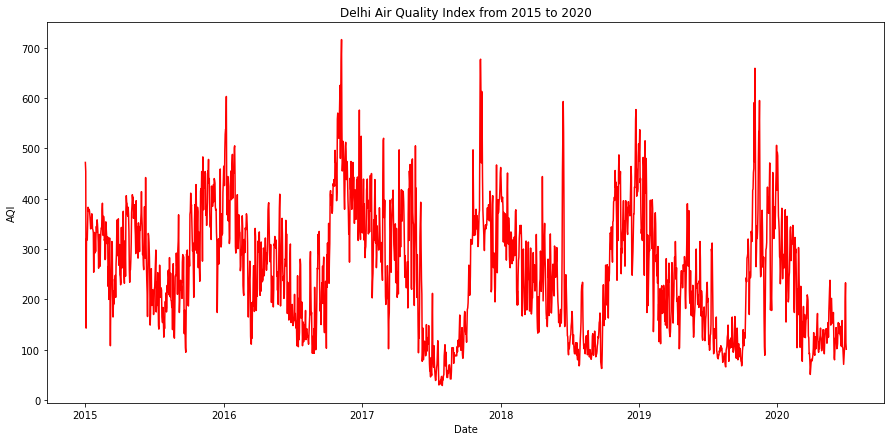

In [960]:
plt.figure(figsize=(15,7))
sns.lineplot(data=Delhi_air_weather, x="Date", y="AQI", color = 'r')
plt.title('Delhi Air Quality Index from 2015 to 2020')
plt.show()

The red line show the value of AQI, as shown on the above graph, the Air Quality Index in Delhi is really high. It means this city is in highly polluted situation. The graph also show seasonal trend, in which the AQI tend to be low in the summer and fall, and high at the end of the year.

Text(0.5, 1.0, 'Boxplot of Delhi AQI through the year')

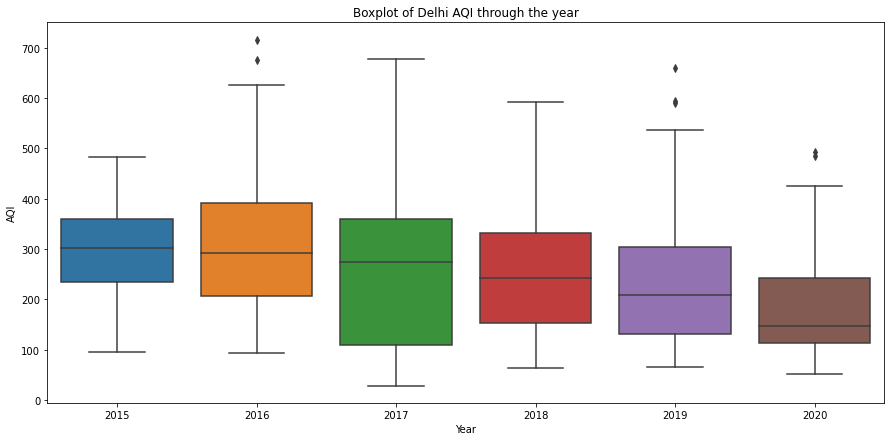

In [961]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Year", y="AQI", data=Delhi_air_weather).set_title('Boxplot of Delhi AQI through the year')

#### Delhi average AQI through the months

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


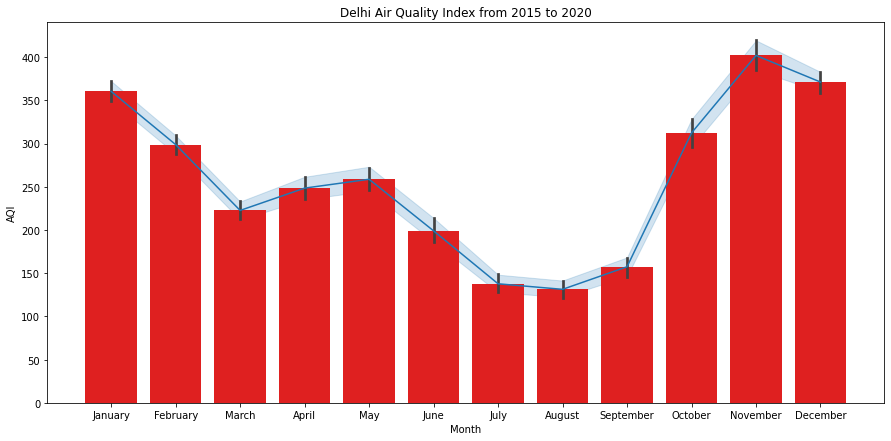

In [962]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month',y='AQI', data=Delhi_air_weather, color ='r')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather)
plt.title('Delhi Air Quality Index from 2015 to 2020')
plt.show()

#### Delhi AQI bucket through the years

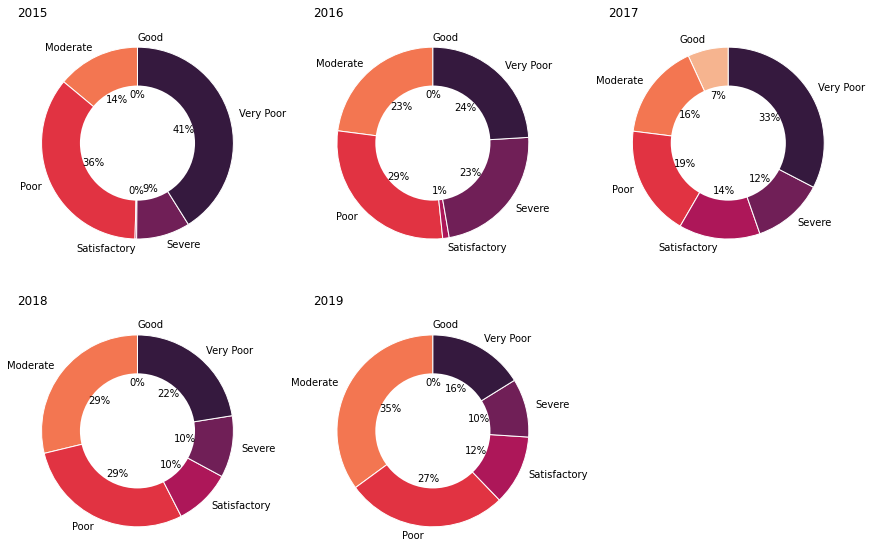

In [963]:
Delhi_Bucket = Delhi_air_weather[['AQI_Bucket','Year','Date']].groupby(['Year','AQI_Bucket']).count().reset_index()
#Delhi_Bucket = Delhi_Bucket.loc[Delhi_Bucket['Year'] != 2020].pivot(index=['Year'],columns='AQI_Bucket', values='Date').replace(np.nan,0)
Delhi_Bucket = Delhi_Bucket.loc[Delhi_Bucket['Year'] != 2020].pivot(index=['AQI_Bucket'],columns='Year', values='Date').replace(np.nan,0)
#Delhi_Bucket.columns = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very poor', 'Severe']
Delhi_Bucket = Delhi_Bucket.reset_index(drop=False)

pie, ax = plt.subplots(figsize=[15,15])
labels = Delhi_Bucket['AQI_Bucket']
pal = sns.color_palette(palette='rocket_r', n_colors=6, desat=None)
num=0
for i in Delhi_Bucket.drop('AQI_Bucket',axis=1).columns:
    num+=1
    plt.subplot(3,3, num)
    plt.pie(x=Delhi_Bucket[i], autopct="%1.f%%", startangle=90, pctdistance=0.5, labels = labels, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=pal)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(i, loc='left', fontsize=12, fontweight=0 )

### 3.2.2 Delhi meteorological factors and AQI

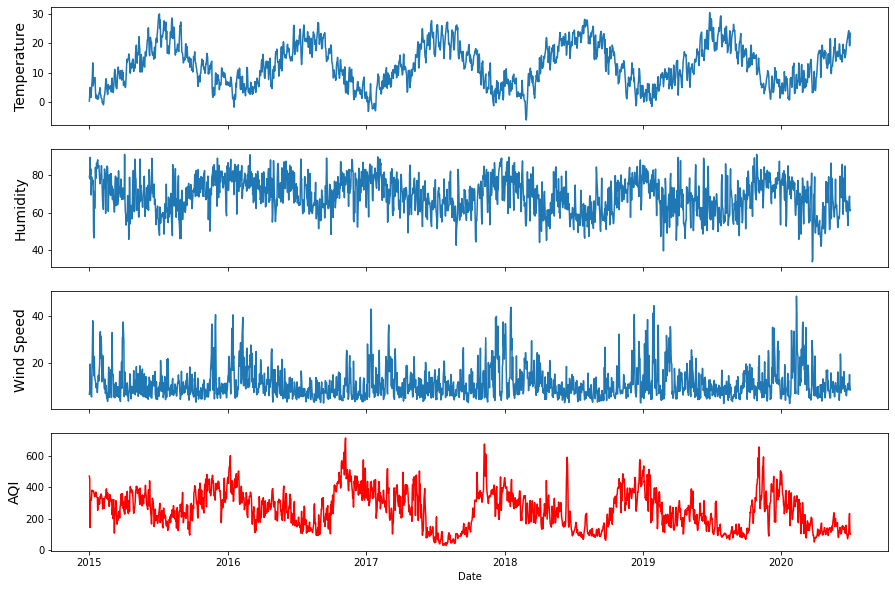

In [964]:
f, ax = plt.subplots(nrows=4, ncols=1,sharex=True, figsize=(15, 10))
for i, column in enumerate(Delhi_air_weather[['Temperature','Humidity', 'Wind Speed', 'AQI']].columns):
    #plt.title('Delhi Temperature through the years from 2015 to 2020')
    if column == 'AQI':
        sns.lineplot(x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i], color='red')
    else:
        sns.lineplot( x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i])
    ax[i].set_ylabel(ylabel=column, fontsize=14)  


The graph above show the Delhi meteorological factors throughout the years as compared to AQI. First, have a look at meteorological factors, we can clearly see the seasonal trend in Temperature, in which it is high in summer and low in Winter. Humidity and Wind Speed factors also shows some seasonal trend, but not as clearly as Temperature. We can also spotted from the graph that Temperature and AQI have somewhat opposite trend, when Temperature is high, AQI tend to be low. Let’s discover that in below graphs.

#### Delhi meteorological factors relationship with AQI throughout the months

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Delhi Temperature and AQI')

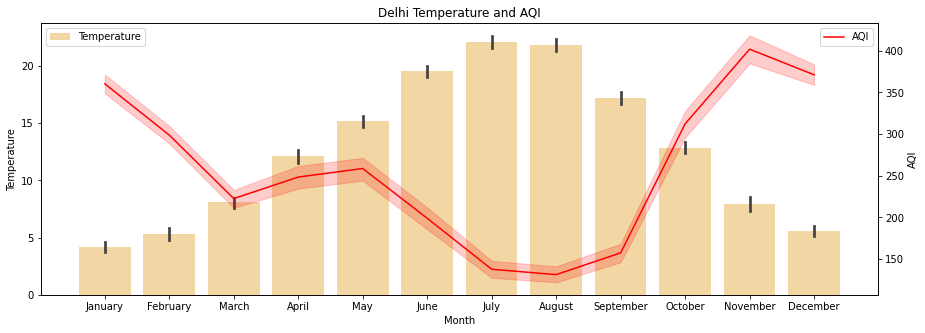

In [965]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
sns.barplot(x='Month',y='Temperature', data=Delhi_air_weather,ax=ax1, label='Temperature', color='orange', alpha = 0.4)
ax1.legend(loc='upper left')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather, ax=ax2, legend = None , label='AQI', color='r')
ax2.legend(loc='upper right')
plt.title('Delhi Temperature and AQI')

As expected in the above chart, the temperature trend is opposite with humidity and AQI. It can be partly figured from the above Temperature versus AQI chart that in summer, when the temperature hits the highest point, the AQI is relatively low. The temperature is high in summer, and this is when the AQI reach its lowest. It can be said that Temperature and AQI has negative correlation.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Delhi Humidity and AQI')

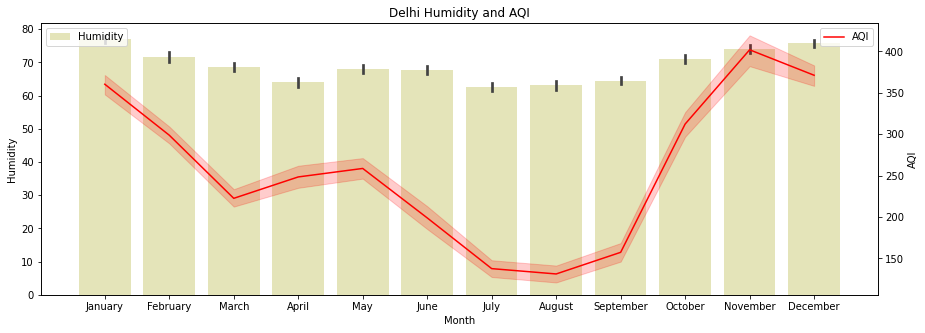

In [966]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
sns.barplot(x='Month',y='Humidity', data=Delhi_air_weather,ax=ax1, label='Humidity', color='y', alpha=0.3)
ax1.legend(loc='upper left')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather, ax=ax2, legend = None , label='AQI', color='r')
ax2.legend(loc='upper right')
plt.title('Delhi Humidity and AQI')

Contrary to Temperature, Humidity is slightly low in the summer as compared to spring and winter. Besides, there is no particular trend spotted, however, we can see that Humidity and AQI have pretty same pattern. Different from Temperature, Humidity, in the other hand, does not have strong correlation with AQI. However, they have a slightly similar trend throughout the year.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Delhi Wind speed and AQI')

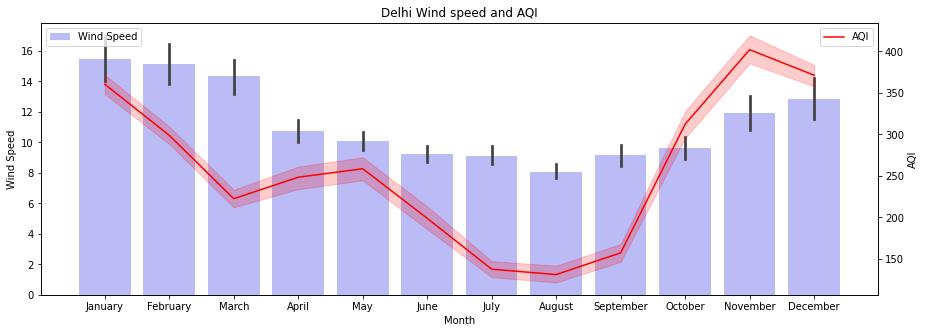

In [967]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
sns.barplot(x='Month',y='Wind Speed', data=Delhi_air_weather,ax=ax1, label='Wind Speed', color='b', alpha=0.3)
ax1.legend(loc='upper left')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather, ax=ax2, legend = None , label='AQI', color='r')
ax2.legend(loc='upper right')
plt.title('Delhi Wind speed and AQI')

### 3.2.3  Delhi polutant substance and AQI

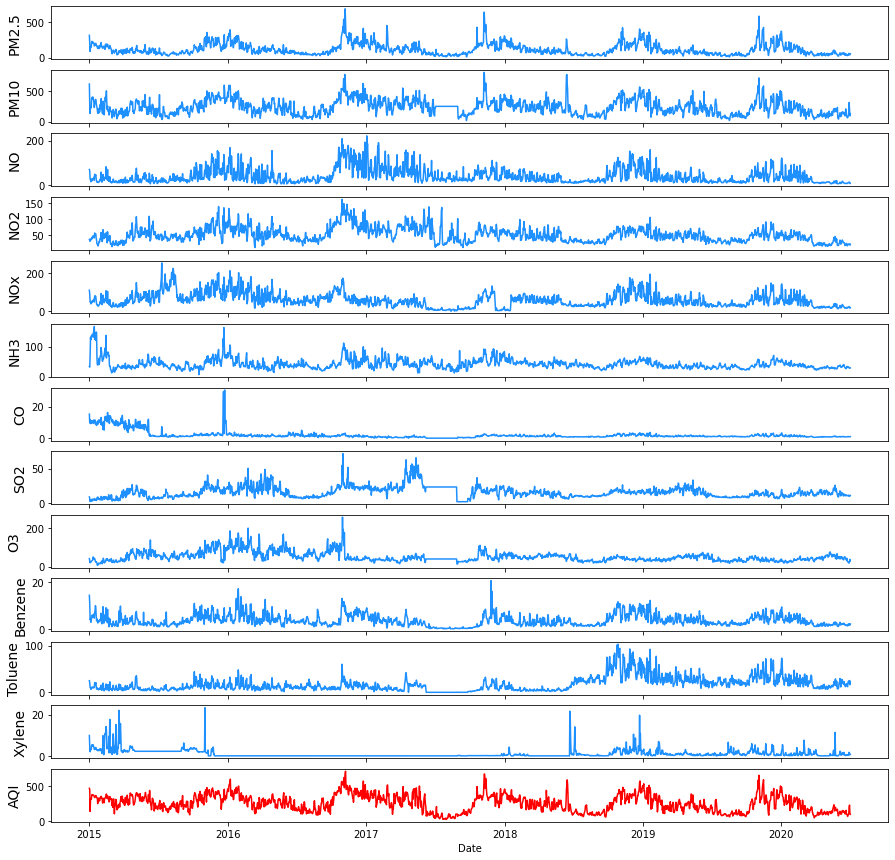

In [968]:
f, ax = plt.subplots(nrows=13, ncols=1,sharex=True, figsize=(15, 15))

#for i, column in enumerate(air_weather_plot[['Temperature','Humidity', 'Wind Speed','Wind Direction', 'AQI']]):
for i, column in enumerate(Delhi_air_weather.drop(['Date', 'Temperature','Humidity', 'Wind Speed', 'Wind Direction', 'Year','MonthNr', 'Season', 'AQI_Bucket', 'Month'], axis=1).columns):
    if column == 'AQI':
        sns.lineplot(x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i], color='red')
    else:
        sns.lineplot(x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i], color='dodgerblue')
    #ax[i].set_title('Feature: {}'.format(column), fontsize=14, loc='right')
    ax[i].set_ylabel(ylabel=column, fontsize=14)  

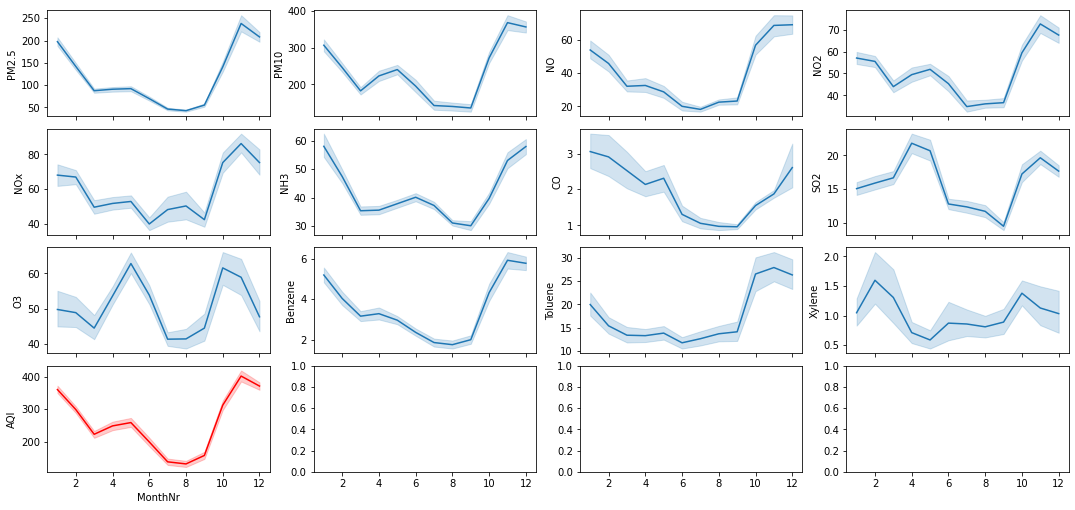

In [969]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 7), sharex=True)
ax = ax.flatten()
index = 0
for i in Delhi_air_weather.drop(['Date', 'Temperature','Humidity', 'Wind Speed', 'Wind Direction', 'Year','MonthNr', 'Season', 'AQI_Bucket', 'Month'], axis=1).columns:
    if i == 'AQI':
        sns.lineplot(x='MonthNr', y=i, data=Delhi_air_weather, ax=ax[index], color='r')
    else:
        sns.lineplot(x='MonthNr', y=i, data=Delhi_air_weather, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()

### 3.2.3 Other cities's air quality
#### Cities air quality map

In [970]:
loc_Cities = Cities_air_weather.drop(['Date','AQI_Bucket'],axis=1).groupby(['City','lon','lat']).mean().reset_index()

m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

for i in range(0,len(loc_Cities)):
   folium.Circle(
      location=[loc_Cities.iloc[i]['lat'], loc_Cities.iloc[i]['lon']],
      popup=loc_Cities.iloc[i]['City'],
      radius=float(loc_Cities.iloc[i]['AQI'])*2000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m

This graph plot the 3-years-average AQI recorded only first 2 weeks of October. As we notice from the first glance, there is a big circle, which represent Ahmedabad, overlap other circles of other city. This city must have much higher AQI than other cities, following is Delhi and Patna. Let’s plot this in a line graph to see the difference regarding the amount of AQI:

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


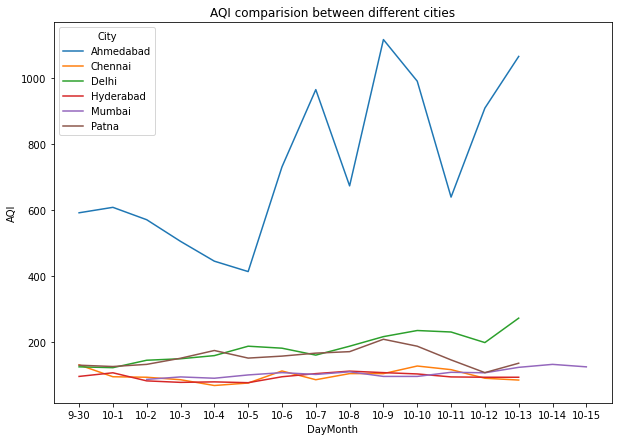

In [971]:
Cities_air_weather['Year'] = Cities_air_weather.Date.dt.year
Cities_air_weather['MonthNr'] = Cities_air_weather.Date.dt.month
Cities_air_weather['Day'] = Cities_air_weather.Date.dt.day
Cities_air_weather['DayMonth'] = Cities_air_weather[['MonthNr','Day']].astype(str).agg('-'.join, axis=1)
#Cities_air_weather['DayMonth'] = [datetime.strptime(x, '%m-%d') for x in Cities_air_weather['DayMonth']]
#Cities_air_weather.sort_values(by=['Date'])
conditions = [
    (Cities_air_weather['MonthNr']>=1) & (Cities_air_weather['MonthNr'] < 4),
    (Cities_air_weather['MonthNr'] >=4) & (Cities_air_weather['MonthNr'] < 7),
    (Cities_air_weather['MonthNr'] >=7) & (Cities_air_weather['MonthNr'] < 10),
    (Cities_air_weather['MonthNr'] >=10) & (Cities_air_weather['MonthNr'] <= 12)]
choices = ['1', '2', '3', '4']
Cities_air_weather['Season'] = np.select(conditions, choices)
Cities_air_weather['Day'] = Cities_air_weather.Date.dt.day

dm_cities = Cities_air_weather.groupby(['City','Day', 'MonthNr','DayMonth']).mean().sort_values(by=['City','MonthNr', 'Day']).reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(data=dm_cities, x="DayMonth", y="AQI", hue="City", legend=True, palette='tab10')
plt.title('AQI comparision between different cities')
plt.show()

# 4. Modelling preparation

## 4.1 Treat Outliers

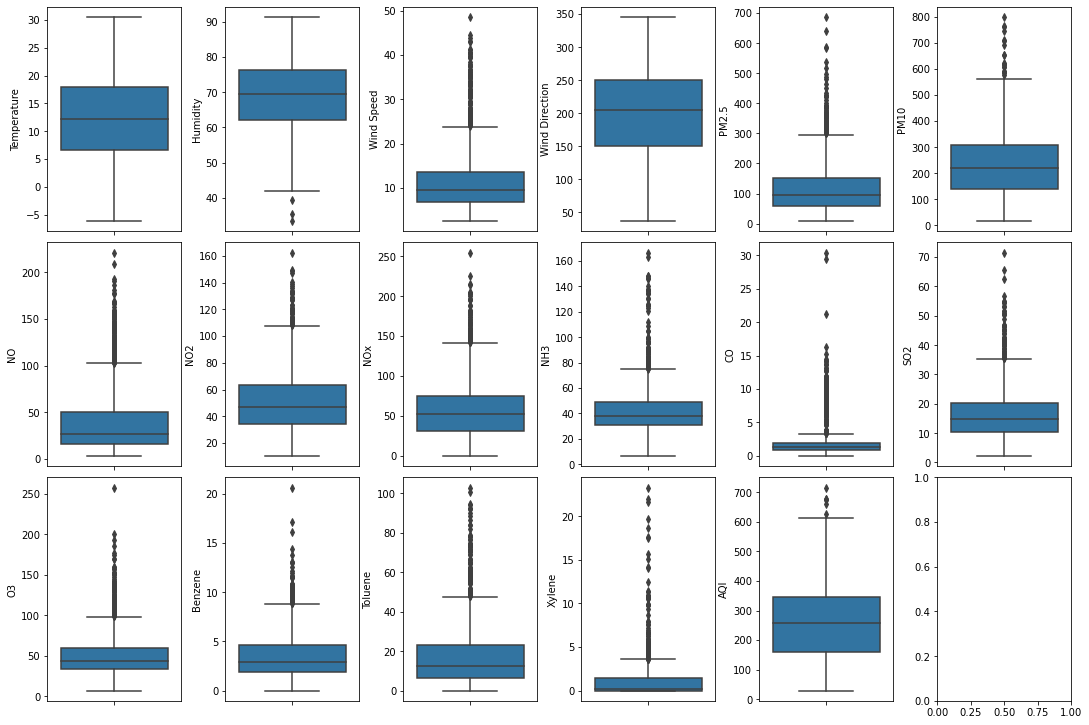

In [972]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(15, 10))
ax = ax.flatten()
index = 0
for i in Delhi_air_weather.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1).columns:
    sns.boxplot(y=i, data=Delhi_air_weather, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

Check for number of outliers:

In [973]:
for i in Delhi_air_weather.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1).columns:
    Delhi_air_weather.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = Delhi_air_weather[i].quantile([0.25,0.75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    outlier_data = Delhi_air_weather[i][(Delhi_air_weather[i] < lower_bound) | (Delhi_air_weather[i] > upper_bound)] #creating a series of outlier data
    perc = (outlier_data.count()/Delhi_air_weather[i].count())*100
    print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))


Outliers in Temperature is 0.00% with count 0
Outliers in Humidity is 0.15% with count 3
Outliers in Wind Speed is 6.17% with count 124
Outliers in Wind Direction is 0.00% with count 0
Outliers in PM2.5 is 3.63% with count 73
Outliers in PM10 is 0.95% with count 19
Outliers in NO is 6.62% with count 133
Outliers in NO2 is 2.54% with count 51
Outliers in NOx is 3.93% with count 79
Outliers in NH3 is 4.08% with count 82
Outliers in CO is 9.21% with count 185
Outliers in SO2 is 2.89% with count 58
Outliers in O3 is 5.62% with count 113
Outliers in Benzene is 4.18% with count 84
Outliers in Toluene is 4.93% with count 99
Outliers in Xylene is 5.57% with count 112
Outliers in AQI is 0.30% with count 6


To get rid of this we can either drop the observations or replace with some approach. But dropping all the outlier observations is not a good idea as we will be left with very fewer observations due to higher percentage of outliers to train our model on, also if we replace such a big percentage of the outliers with some approach (mean, median...etc.) then it might result into less accurate or biased model.

We can use an alternative: replace the outliers by the upper range or lower range value of that variable

In [974]:
Delhi_air_weather.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1)

Temperature   Humidity  Wind Speed  Wind Direction   PM2.5    PM10  \
0        0.371362  79.416667    6.605597      191.054508  313.22  607.98   
1        2.555945  78.041667    8.106652      186.098857  186.18  269.55   
2        5.011779  89.541667   19.498835      208.326001   87.18  131.90   
3        4.181779  80.541667   11.207847      282.424481  151.84  241.84   
4        1.623862  83.333333    7.691152      104.005272  146.60  219.13   
...           ...        ...         ...             ...     ...     ...   
2004    24.269279  62.291667    8.500703      234.589204   39.80  155.94   
2005    21.448863  66.833333   10.920473      229.664425   59.52  308.65   
2006    19.146363  68.791667   15.040291      234.075933   44.86  184.12   
2007    19.410529  60.875000   10.252491      246.485056   39.80   91.98   
2008    23.388029  61.458333    8.442125      179.892856   54.01  128.66   

         NO    NO2     NOx     NH3     CO    SO2     O3  Benzene  Toluene  \
0     69.16  36.39  110.59   33.85  15.20   9.25  41.68    14.36    24.86   
1     62.09  32.87   88.14   31.83   9.54   6.65  29.97    10.55    20.09   
2     25.73  30.31   47.95   69.55  10.61   2.65  19.71     3.91    10.23   
3     25.01  36.91   48.62  130.36  11.54   4.63  25.36     4.26     9.71   
4     14.01  34.92   38.25  122.88   9.20   3.33  23.20     2.80     6.21   
...     ...    ...     ...     ...    ...    ...    ...      ...      ...   
2004  10.88  21.46   22.47   31.43   0.87  10.38  18.88     1.69    19.99   
2005  12.67  21.60   23.86   29.27   0.94  10.70  18.05     1.71    25.13   
2006  10.50  21.57   21.94   27.97   0.88  11.58  26.61     2.13    23.80   
2007   5.99  17.96   15.44   28.48   0.84  10.51  37.29     1.57    16.37   
2008   6.33  21.05   16.81   29.06   0.97  11.15  29.73     2.03    23.57   

      Xylene    AQI  
0       9.84  472.0  
1       4.29  454.0  
2       1.99  143.0  
3       3.34  319.0  
4       2.96  325.0  
...      ...    ...  
2004    0.43  112.0  
2005    1.74  196.0  
2006    1.13  233.0  
2007    0.49  114.0  
2008    0.65  101.0  

[2009 rows x 17 columns]

In [975]:
def treat_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

for i in Delhi_air_weather.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1).columns:
    low_range, up_range = treat_outlier(Delhi_air_weather[i])
    mean = Delhi_air_weather[i].mean()
    Delhi_air_weather[i] = np.where(Delhi_air_weather[i] > up_range, up_range, Delhi_air_weather[i])
    Delhi_air_weather[i] = np.where(Delhi_air_weather[i] < low_range, low_range, Delhi_air_weather[i])

## 4.2 Feature selection

<AxesSubplot:>

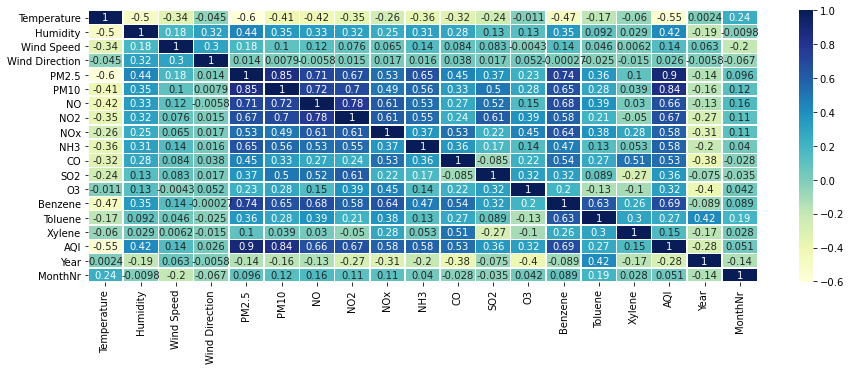

In [976]:
fig, ax = plt.subplots(figsize=(15,5))   
sns.heatmap(Delhi_air_weather.corr(), cmap="YlGnBu", annot=True,linewidths=.5, ax=ax)

The heatmaps  give first impression that the polutant substances has more correlation with AQI rather than weather features. Polutant substances such as PM2.5, PM10, NO2 and CO have high correlation with AQI, and some of the polutant substances correlated with each other.

In [977]:
X = Delhi_air_weather.iloc[:, 1:-6]
Y = Delhi_air_weather.iloc[:, 17]

def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #delete the valriable for that p value
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((2009,1))  #adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

X.columns

Index(['Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'Toluene'],
      dtype='object')

The Backward Elimination feature selection already suggests variables that can be used to predict AQI, which are 'Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'O3', and 'Toluene'. However, as Humidity and Wind are some of the meteological feature that go closely with Temperature, which can also affect the AQI. Therefore, Humidity and Wind, although are not suggested by Backward Elimination techniques, will not be deleted for future analysis below. Others variables will be deleted as suggested by Backward Elimination.

In [978]:
Cities_air_weather = Cities_air_weather[Cities_air_weather['City']=='Delhi']

Delhi_air_weather=Delhi_air_weather.drop(['Humidity','Wind Speed','Wind Direction'],axis=1)
Cities_air_weather=Cities_air_weather.drop(['Precipitation', 'Humidity',
       'Sea Level Pressure', 'Wind Speed', 'Wind Gust', 'City', 'lat', 'lon'],axis=1)

## 4.3 Finalize train-test data

In [979]:
x_train = Delhi_air_weather.iloc[:, 1:-6]
Y_train = Delhi_air_weather['AQI']
x_test = Cities_air_weather.iloc[:, 1:-7]
Y_test = Cities_air_weather['AQI']

## 4.4 Normalization

In [980]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(x_train)    
X_test= st_x.transform(x_test)  

# 5. Modelling

## 5.1 Regression models

### 5.1.1 Linear regression model

In [981]:
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.tail(10)

Actual   Predicted
74   113.0  115.506457
75   108.0  123.372052
76   127.0  148.559678
77   133.0  144.480274
78   123.0  131.213626
79   165.0  188.257703
80   208.0  214.932963
81   243.0  210.850959
82   235.0  215.098906
83   282.0  259.081899

### 5.1.2 Polynomial regression model

In [982]:
polyRegressor = PolynomialFeatures(degree=3)
#X_train_poly = polyRegressor.fit_transform(X_train)
#X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train, Y_train)
Y_pred = poly.predict(X_test)
Y_compare_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_poly.tail(10)

Actual   Predicted
74   113.0  115.506457
75   108.0  123.372052
76   127.0  148.559678
77   133.0  144.480274
78   123.0  131.213626
79   165.0  188.257703
80   208.0  214.932963
81   243.0  210.850959
82   235.0  215.098906
83   282.0  259.081899

### 5.1.3 Support vector regression model

In [983]:
svr = SVR(kernel= 'poly', gamma='scale')
svr.fit(x_train,Y_train)
Y_pred = svr.predict(x_test)
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.tail(10) 

Actual   Predicted
74   113.0  187.830209
75   108.0  188.680401
76   127.0  194.924021
77   133.0  193.297119
78   123.0  190.106317
79   165.0  209.020366
80   208.0  223.478716
81   243.0  217.549025
82   235.0  220.193112
83   282.0  244.507658

### 5.1.4 Decission tree regression model

In [984]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.tail(10)

Actual  Predicted
74   113.0     112.95
75   108.0     111.65
76   127.0     133.58
77   133.0     134.15
78   123.0     122.42
79   165.0     183.87
80   208.0     222.04
81   243.0     239.01
82   235.0     238.68
83   282.0     273.66

### 5.1.5 K-Nearest Neighbour regression model:

In [985]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.tail(10)

Actual   Predicted
74   113.0  113.307692
75   108.0  103.923077
76   127.0  142.230769
77   133.0  120.153846
78   123.0  117.461538
79   165.0  191.846154
80   208.0  222.076923
81   243.0  213.615385
82   235.0  213.615385
83   282.0  263.538462

## 5.2 Regression validation
### 5.2.1 Plotting comparision of actual and predicted values different regression machine learning models

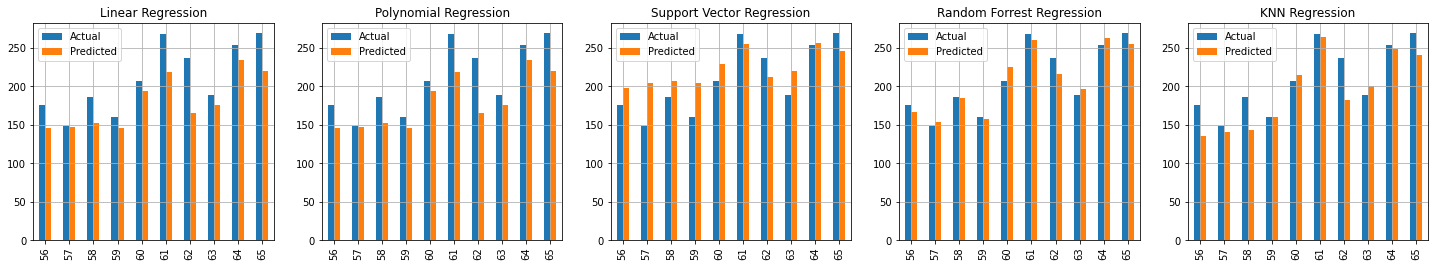

In [986]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.head(10).plot(kind='bar', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.head(10).plot(kind='bar', title='Support Vector Regression', grid=True, ax=ax[2])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[3])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[4])
plt.show()

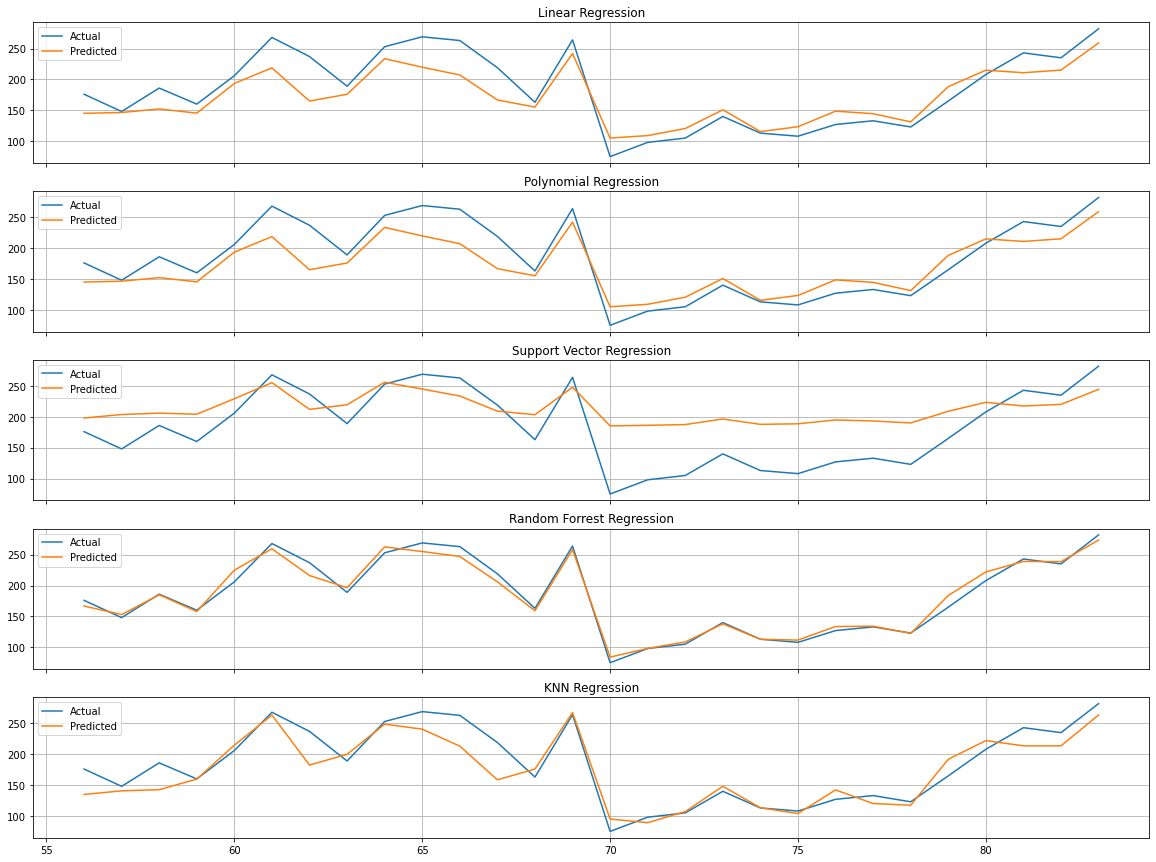

In [987]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(20, 15), sharex=True)
ax = ax.flatten()
Y_compare_linear.plot(kind='line', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.plot(kind='line', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.plot(kind='line', title='Support Vector Regression', grid=True, ax=ax[2])
Y_compare_randomforrest.plot(kind='line', title='Random Forrest Regression', grid=True, ax=ax[3])
Y_compare_knn.plot(kind='line', title='KNN Regression', grid=True, ax=ax[4])
plt.show()

As seen from the graph above, Random Forest Regression seems to be the best regression model to predict AQI. We can evaluate this by calculate accuracy score in cross validation

### 5.2.2 R2 Cross validation:

In [988]:
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
    accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
    counter+=1

Accuracy of Linear Regression model is 0.77
Accuracy of Polynomial Regression model is 0.77
Accuracy of Support Vector Regression model is 0.31
Accuracy of Random Forrest Regression model is 0.82
Accuracy of K-Nearest Neighbour Regression model is 0.73


### 5.2.3 Hyperparameter Tuning:

In [989]:
def Grid_Search_CV_RFR(X_train, y_train):

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

Grid_Search_CV_RFR(X_train, Y_train)

(0.8191698295104329,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 8,
  'n_estimators': 10})

## 5.3 Time series model 

### 5.3.1 Dataset preparation 

In [990]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from prophet import Prophet

In [991]:
#datatrain = Delhi_air_weather.iloc[:, 0:-5]
#datatest = Cities_air_weather[Cities_air_weather['Date'].dt.year == 2018].iloc[:, 0:-6]

datatrain=Delhi_air_weather.iloc[:-400, 0:-5]
datatest =Delhi_air_weather.iloc[-400:, 0:-5]

#### Scaling

In [992]:
scaler = MinMaxScaler()
columns = ['Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
scaler.fit(np.array(datatrain[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatrain[columns] = scaler.transform(np.array(datatrain[columns]))

In [993]:
datatrain.drop(['Date', 'AQI'],axis=1).describe()

Temperature        PM2.5         PM10           NO          NO2  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1609.000000   
mean      0.506514     0.382606     0.416486     0.365567     0.440599   
std       0.198241     0.253527     0.210344     0.285907     0.223389   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.347334     0.184946     0.261977     0.148621     0.266817   
50%       0.490810     0.320098     0.408139     0.267257     0.412130   
75%       0.659217     0.530116     0.558341     0.522640     0.569347   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               NOx          NH3           CO          SO2           O3  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1609.000000   
mean      0.430649     0.523361     0.459160     0.431282     0.492315   
std       0.251843     0.209141     0.276377     0.226768     0.238278   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.247962     0.370083     0.277946     0.251323     0.317609   
50%       0.397177     0.486411     0.395770     0.416452     0.425042   
75%       0.567214     0.642297     0.604230     0.584909     0.626493   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Benzene      Toluene       Xylene  
count  1609.000000  1609.000000  1609.000000  
mean      0.402317     0.305181     0.221551  
std       0.261660     0.261120     0.328017  
min       0.000000     0.000000     0.000000  
25%       0.209106     0.119729     0.000000  
50%       0.349635     0.215513     0.008333  
75%       0.548623     0.431026     0.425000  
max       1.000000     1.000000     1.000000

#### Reset index

In [994]:
datatrain=datatrain.set_index('Date')
datatest =datatest.set_index('Date')

### 5.3.2 Check stationarity and tranforming

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.
-Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

-Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).
If the null hypothesis can be rejected, we can conclude that the time series is stationary. There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [995]:
result = adfuller(datatrain['AQI'].values)
result

(-3.1735746054910905,
 0.02156615029627443,
 17,
 1591,
 {'1%': -3.4344668334240493,
  '5%': -2.8633583388041717,
  '10%': -2.5677380487468597},
 16926.424025342752)

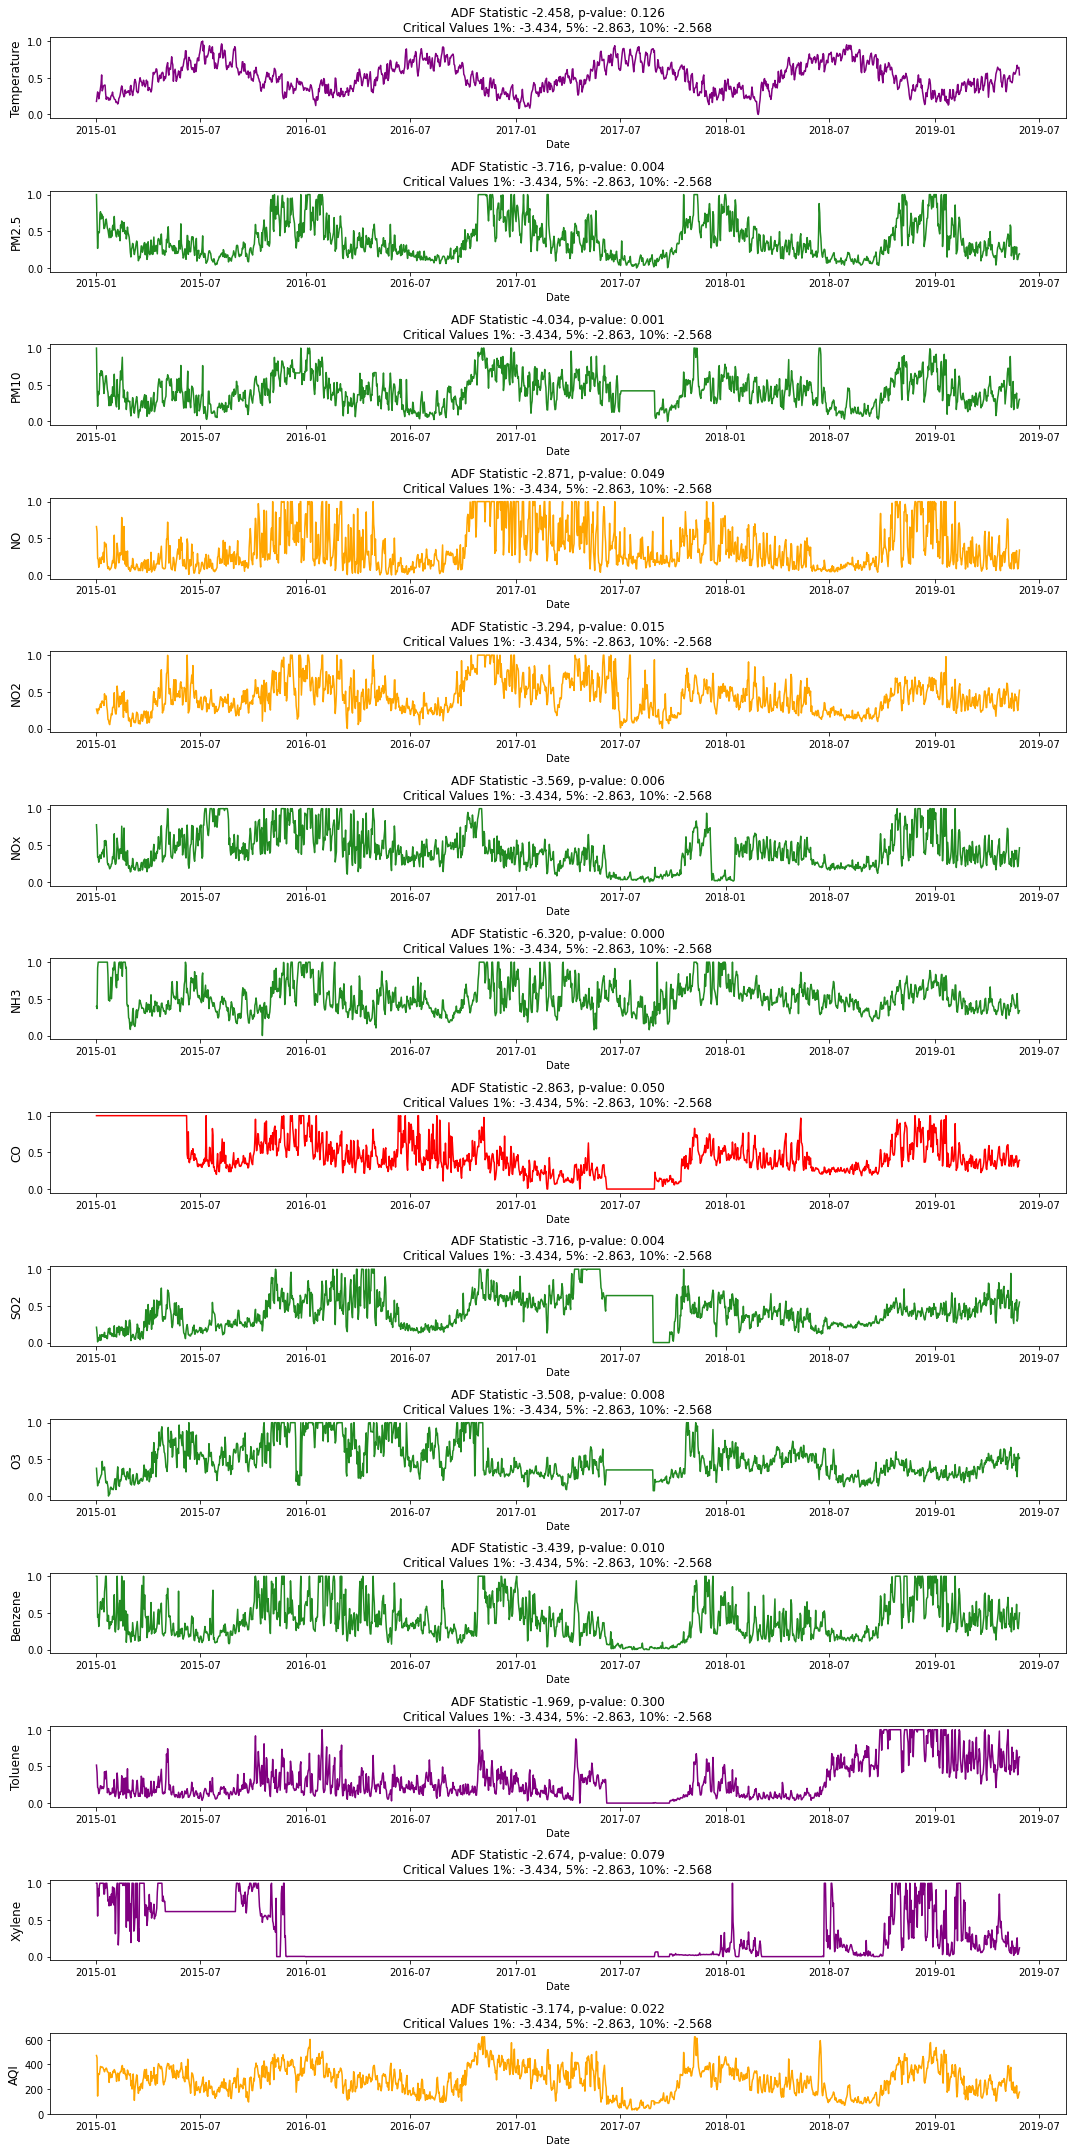

In [996]:
f, ax = plt.subplots(nrows=14, figsize=(15, 30))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=datatrain.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}')
    ax.set_ylabel(ylabel=title, fontsize=12)

index = 0
for column in datatrain.columns:
    visualize_adfuller_results(datatrain[column].values, column, ax[index])
    index+=1


plt.tight_layout()
plt.show()

non-stationary: Temperature, Toluene, CO

stationary: rest of the variables

To use the ARIMA, the data requires stationary, so we can transformed it into stationary:

-Transformation: e.g. log or square root to stabilize non-constant variance

-Differencing: subtracts the current value from the previous

#### Transforming

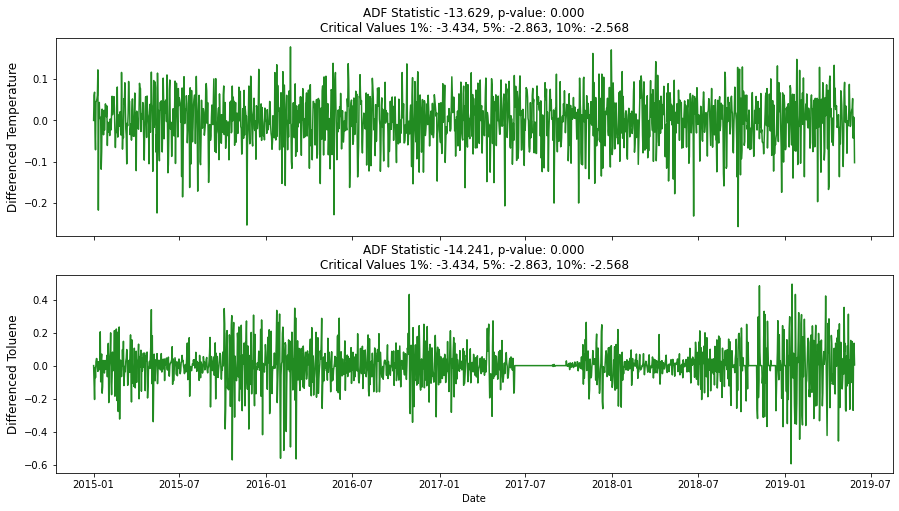

In [997]:
temp_diff = np.diff(datatrain['Temperature'])
datatrain['Temperature_diff'] = np.append([0], temp_diff)
toluene_diff = np.diff(datatrain['Toluene'])
datatrain['Toluene_diff'] = np.append([0], toluene_diff)

f, ax = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(15, 8))
visualize_adfuller_results(datatrain['Temperature_diff'], 'Differenced Temperature', ax[0])
visualize_adfuller_results(datatrain['Toluene_diff'], 'Differenced Toluene', ax[1])

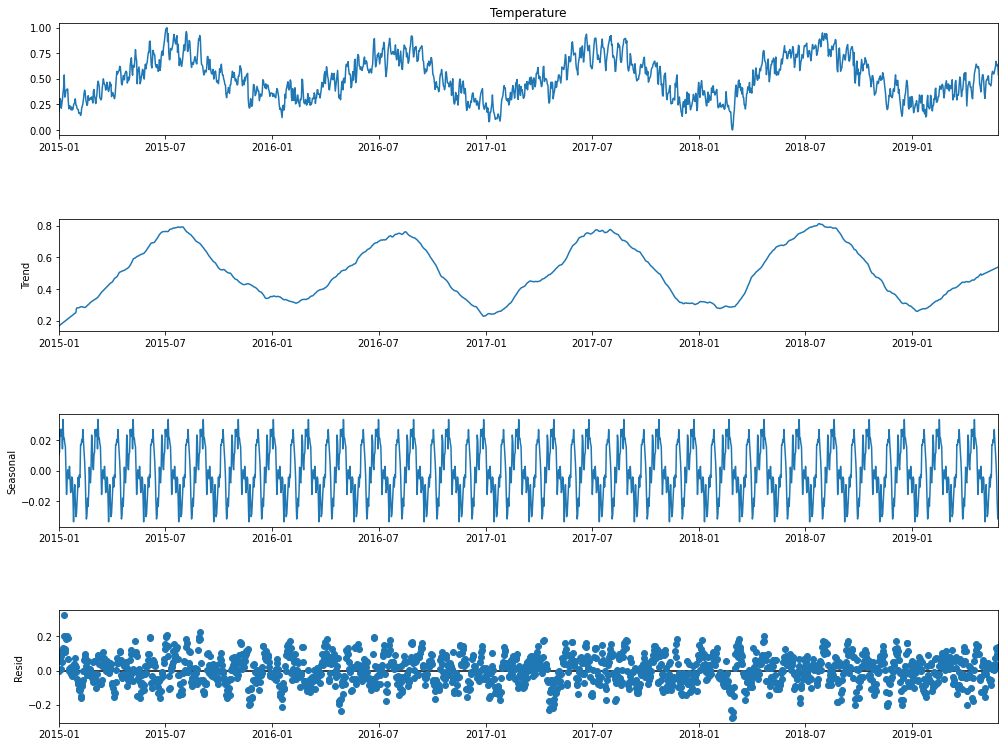

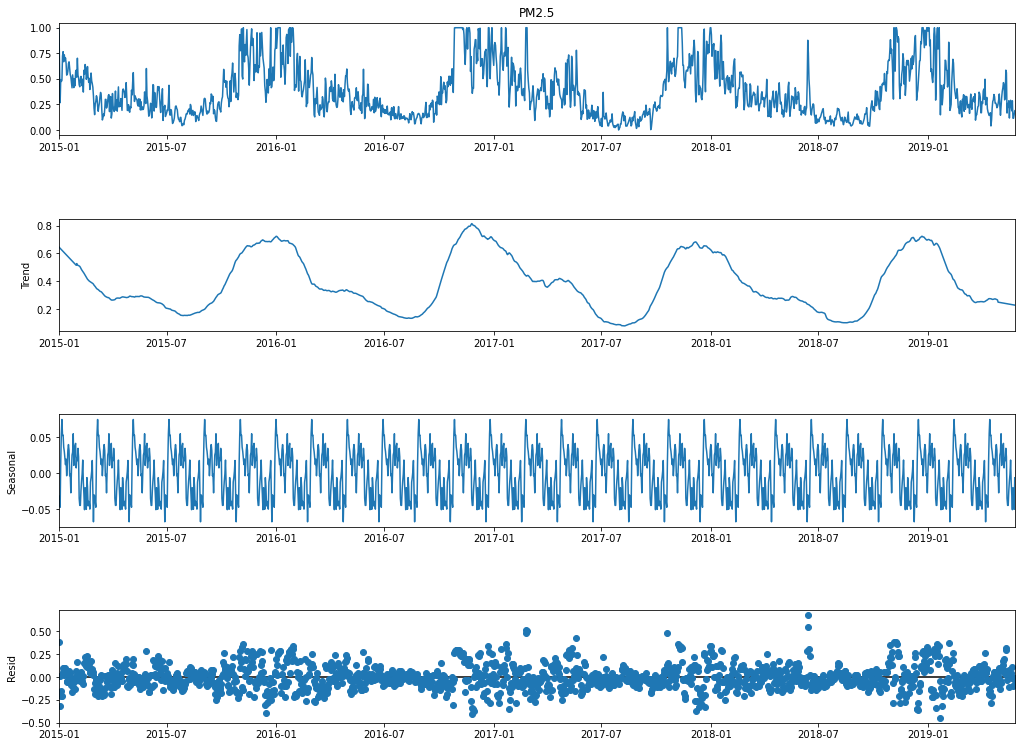

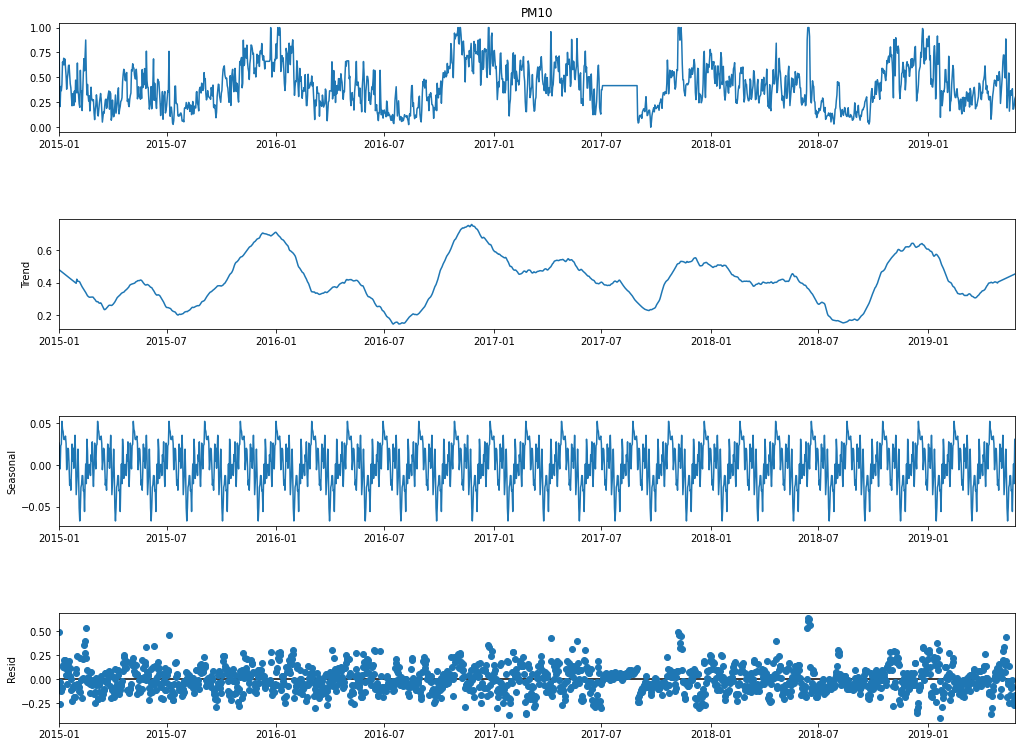

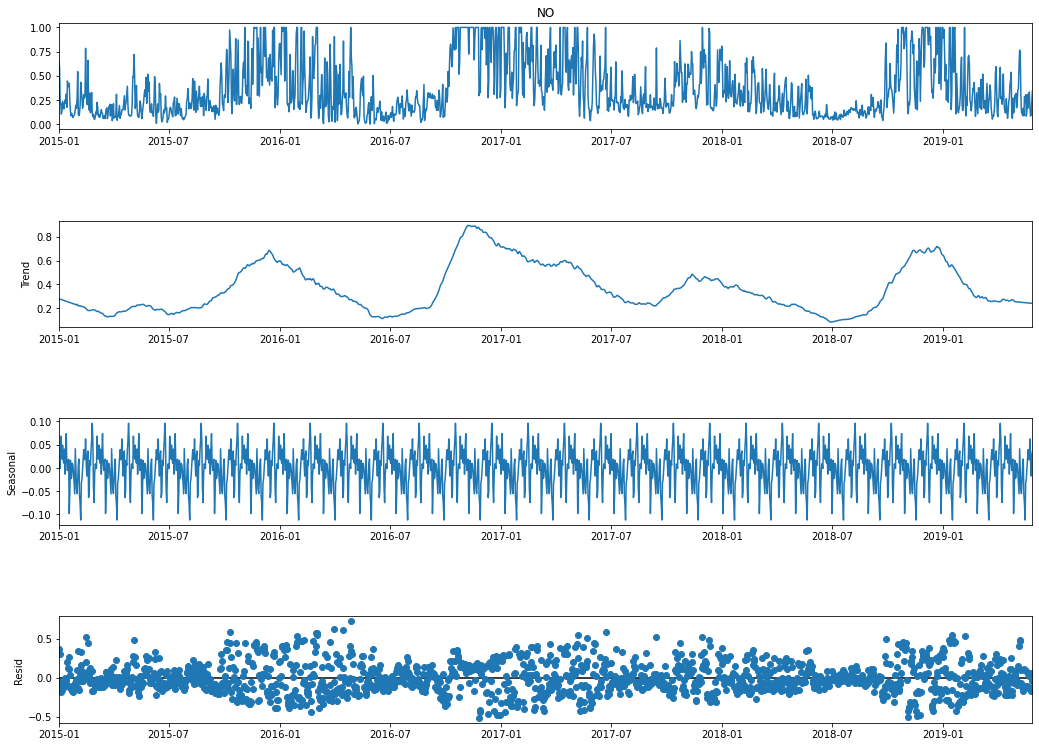

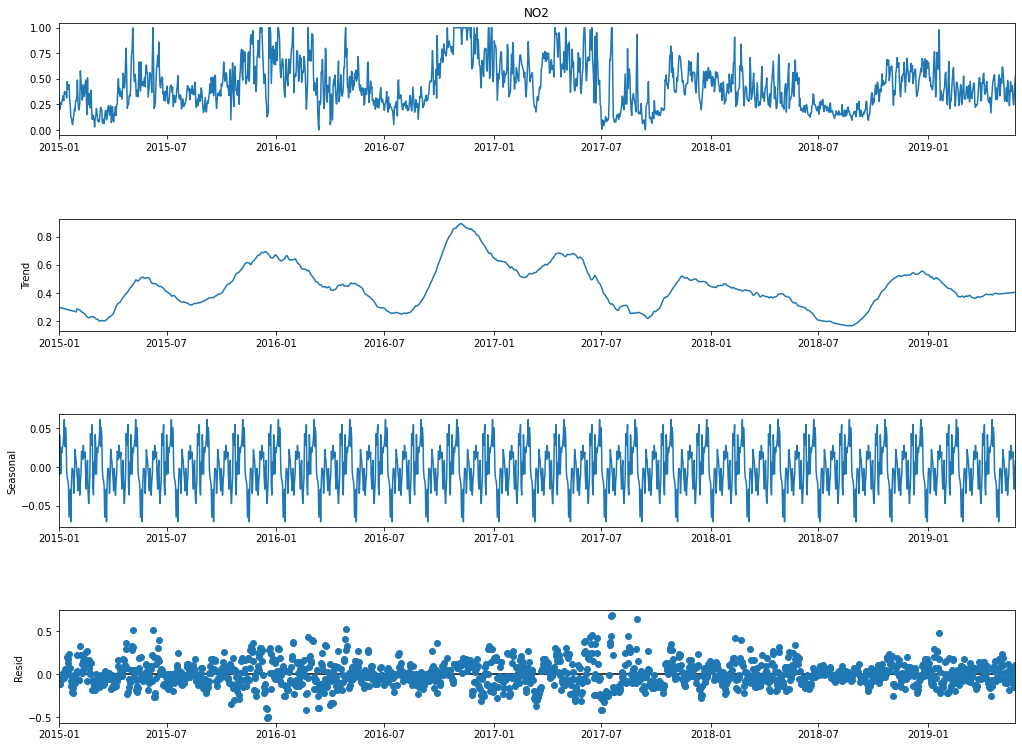

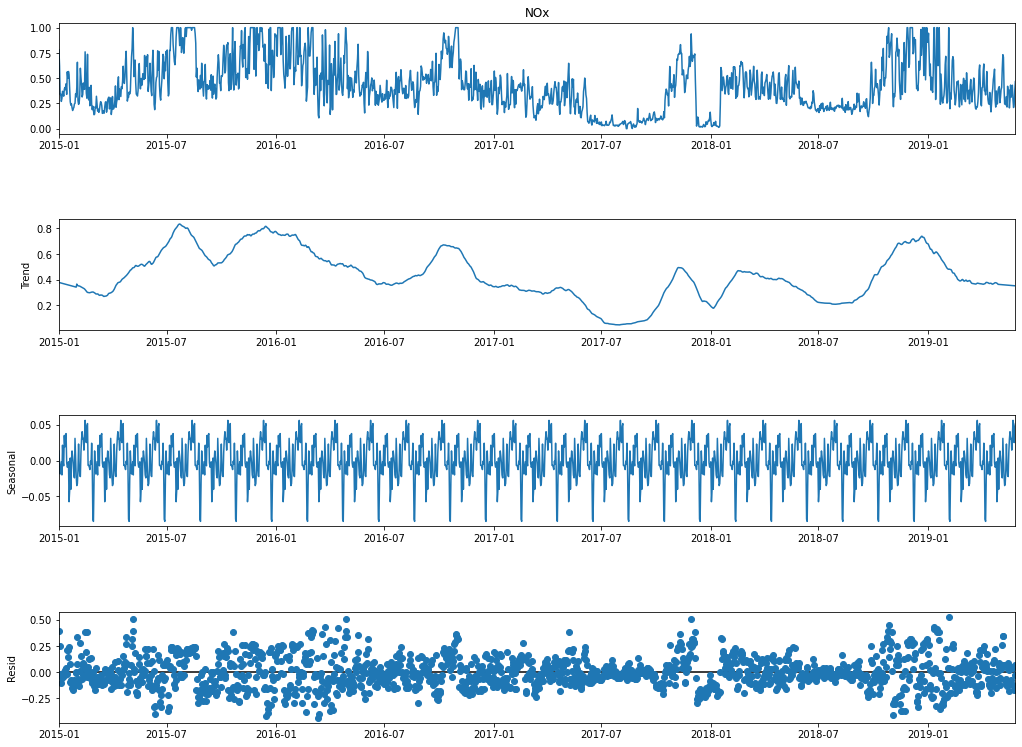

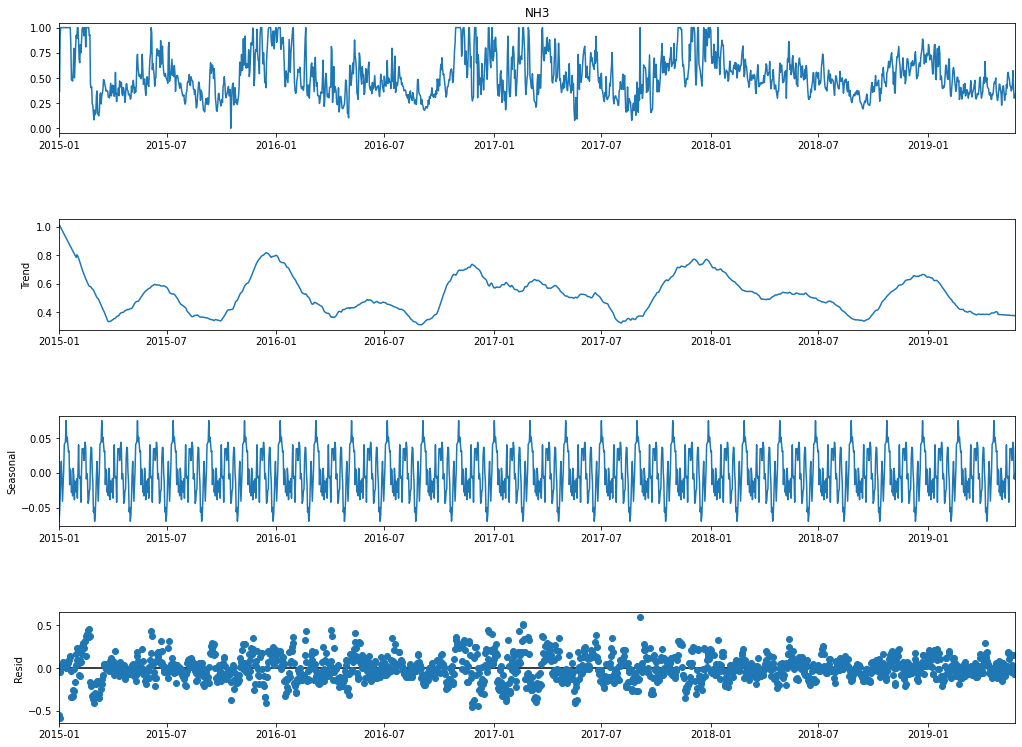

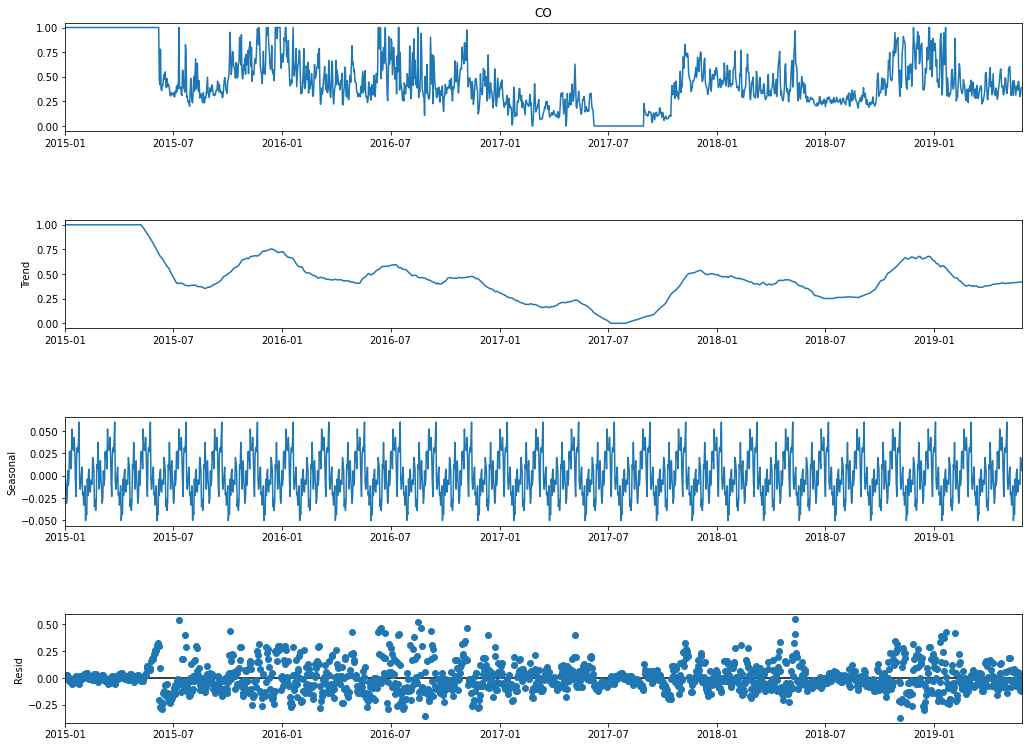

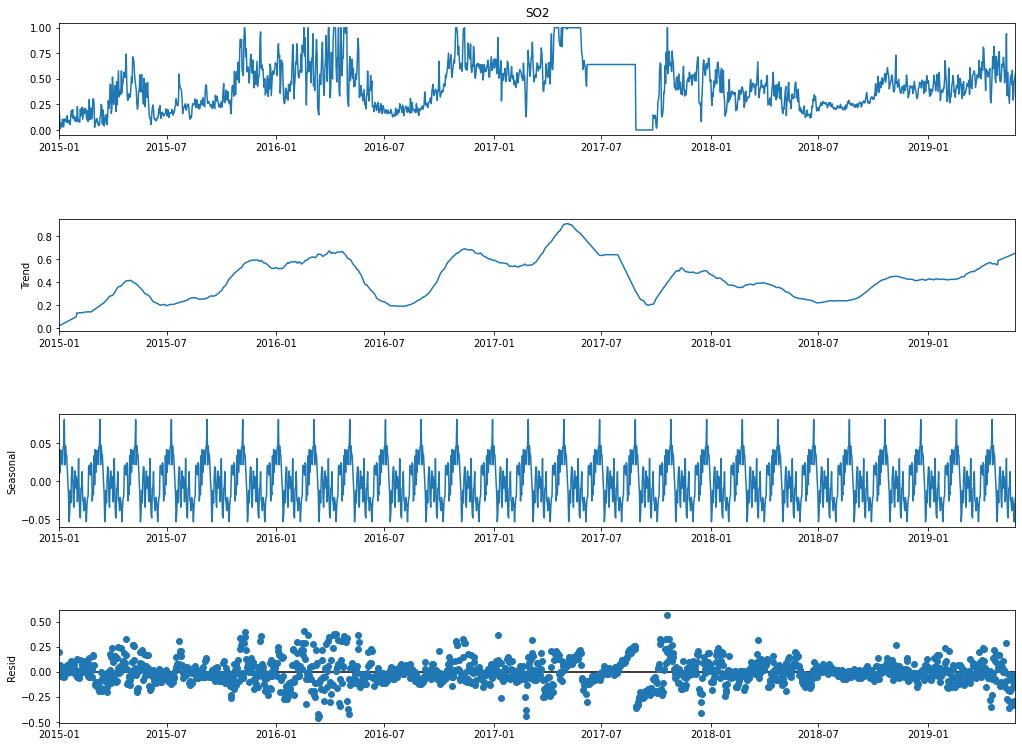

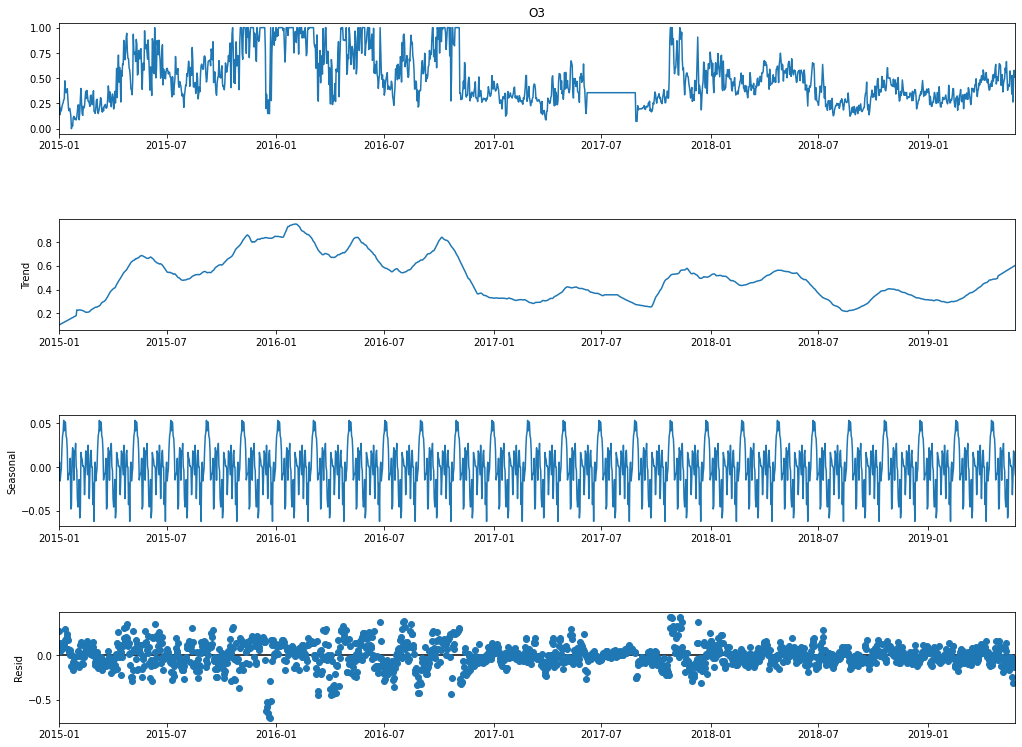

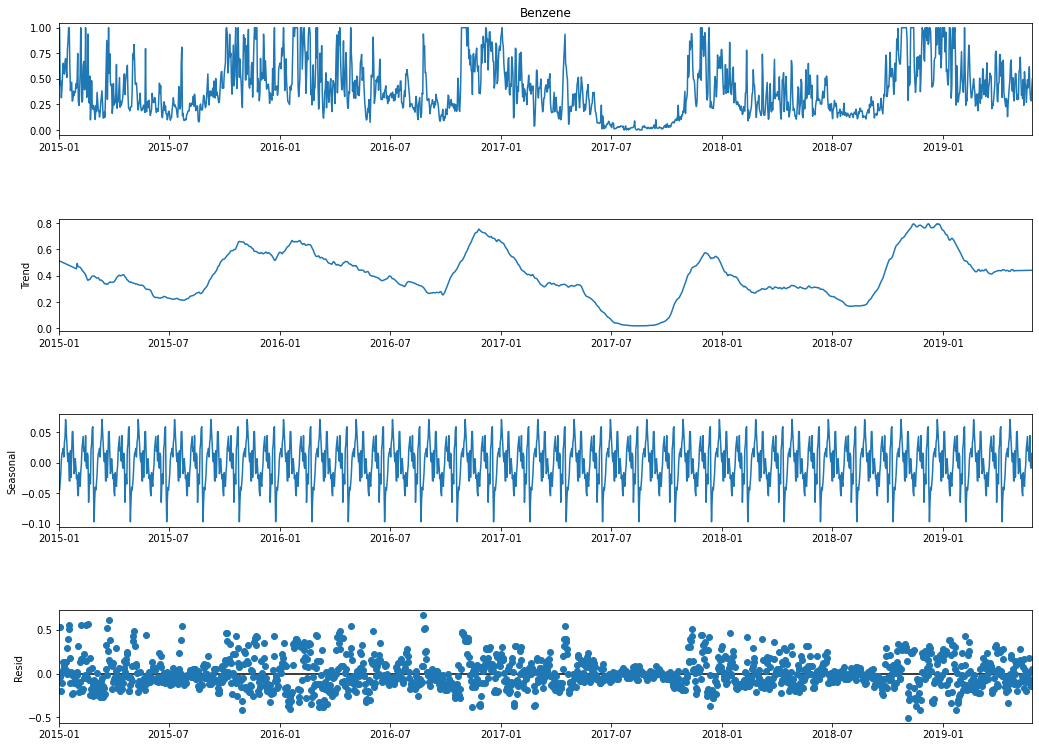

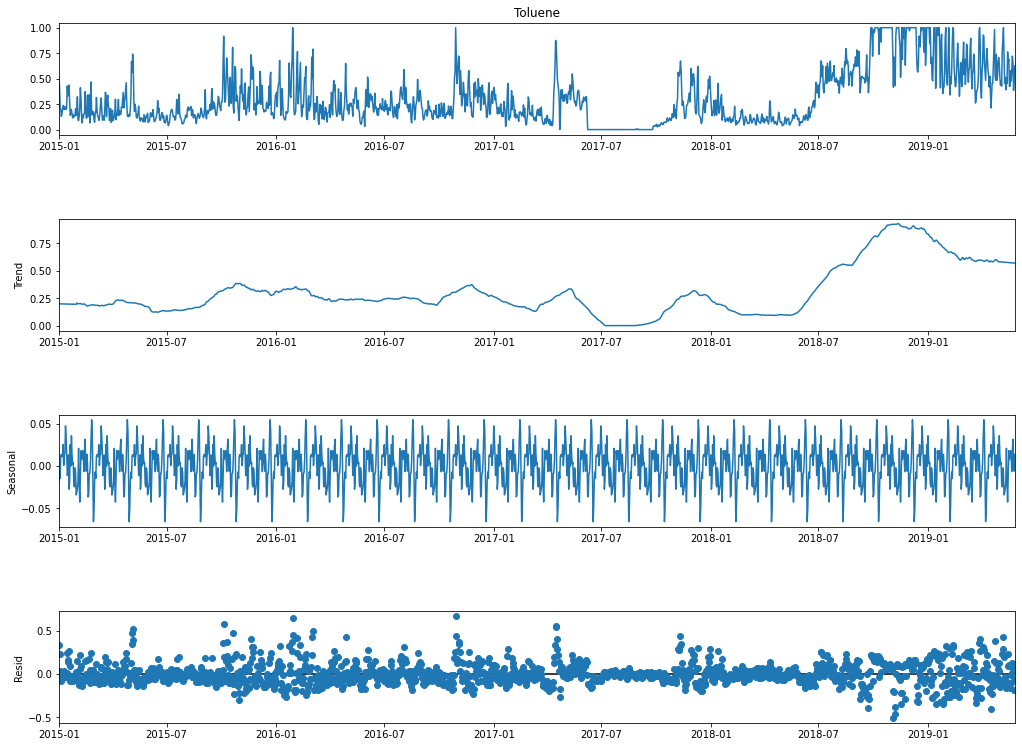

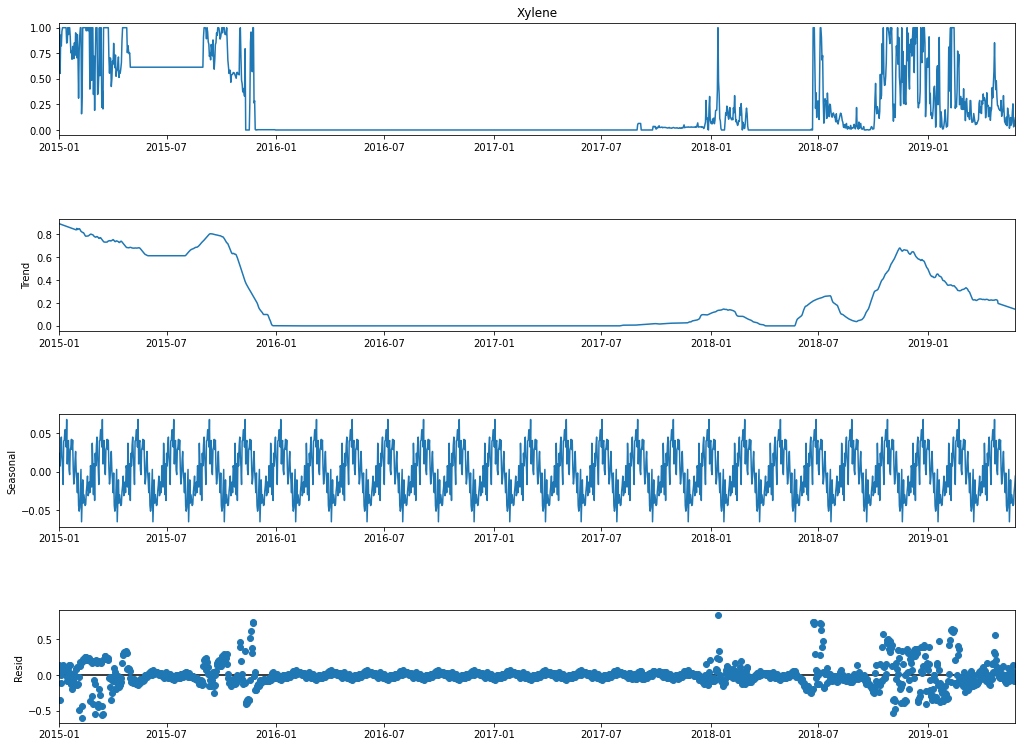

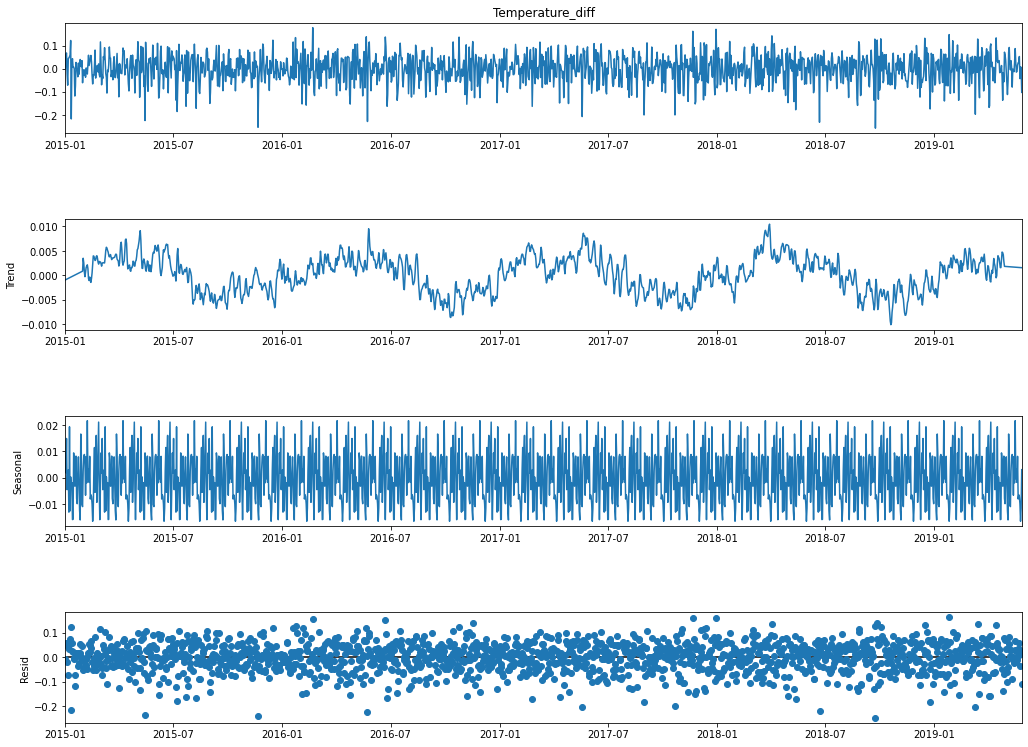

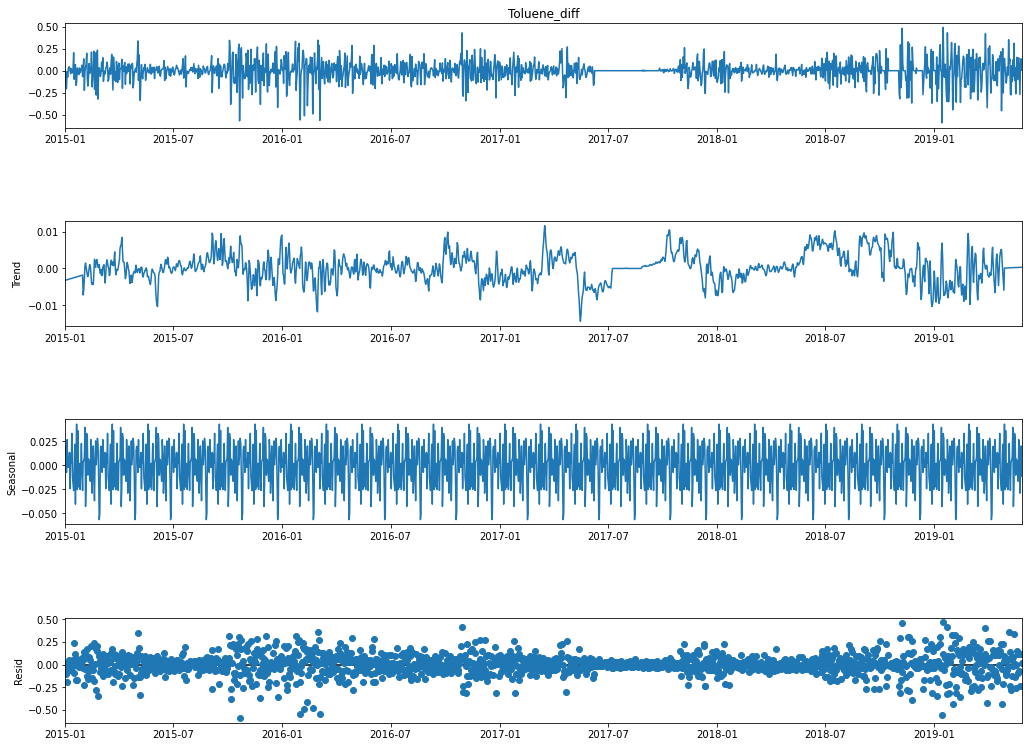

In [998]:
core_columns =  datatrain.drop('AQI',axis=1)

for column in core_columns:
    decomp = seasonal_decompose(datatrain[column], period=60, model='additive', extrapolate_trend='freq')
    #datatraining[f"{column}_trend"] = decomp.trend
    #datatraining[f"{column}_seasonal"] = decomp.seasonal
    fig = decomp.plot()
    fig.set_size_inches(16, 12)

### 5.3.3 Prophet model

In [999]:
feature_columns = [
    'Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene'
]
target_column = ['AQI']

#train_size = int(0.85 * len(df))
train= datatrain.reset_index()
train= train[['Date'] + target_column + feature_columns].copy()
train.columns = ['ds', 'y'] + feature_columns

test = datatest.reset_index()
test = test[['Date'] + target_column + feature_columns].copy()
test.columns = ['ds', 'y'] + feature_columns


x_train, y_train = pd.DataFrame(train.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), pd.DataFrame(train.iloc[:, 1])
x_valid, y_valid = pd.DataFrame(test.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), pd.DataFrame(test.iloc[:, 1])

In [1000]:
model = Prophet()

for column in x_train.drop('ds',axis=1).columns:
    model.add_regressor(column)

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 41.16216097847851


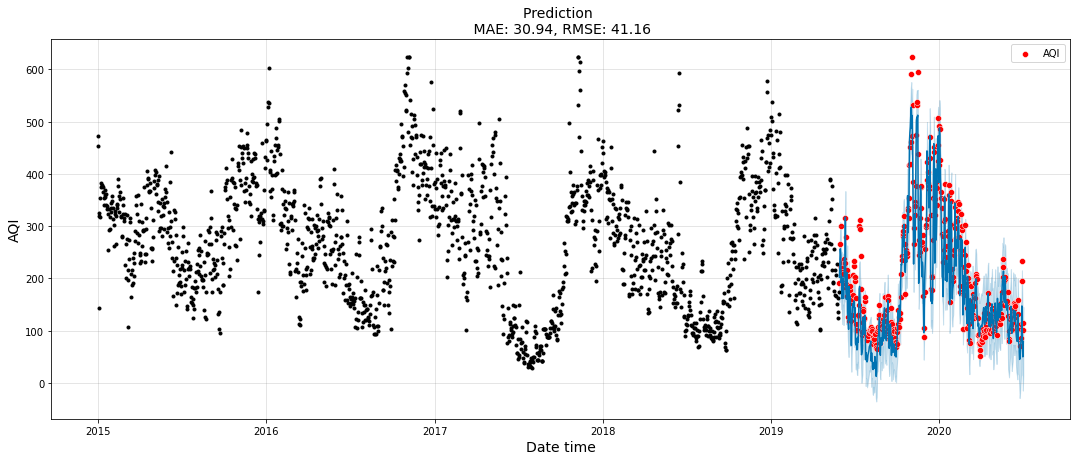

In [1001]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.scatterplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='red', label='AQI') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date time', fontsize=14)
ax.set_ylabel(ylabel='AQI', fontsize=14)

plt.show()

### 5.3.4 VAR model

In [1002]:
train2 = datatrain[target_column + feature_columns].copy()
test2 = datatest[target_column + feature_columns].copy()

def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()


In [1003]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(train2)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(test2))

#converting predictions to dataframe
cols = train2.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,14):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]
        
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test2[i])))

C:\Users\minhh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\minhh\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


rmse value for AQI is :  131.452419877192
rmse value for Temperature is :  0.18673184154705447
rmse value for PM2.5 is :  0.26511014863833676
rmse value for PM10 is :  0.23258029590713986
rmse value for NO is :  0.2632161385717345
rmse value for NO2 is :  0.22151871547405597
rmse value for NOx is :  0.22204352348185408
rmse value for NH3 is :  0.16236519157928353
rmse value for CO is :  0.16763339971920202
rmse value for SO2 is :  0.167240018415568
rmse value for O3 is :  0.19724258648822804
rmse value for Benzene is :  0.19885593859303316
rmse value for Toluene is :  0.2752433592463947
rmse value for Xylene is :  0.2701269501607303


<AxesSubplot:xlabel='date', ylabel='Actual_AQI'>

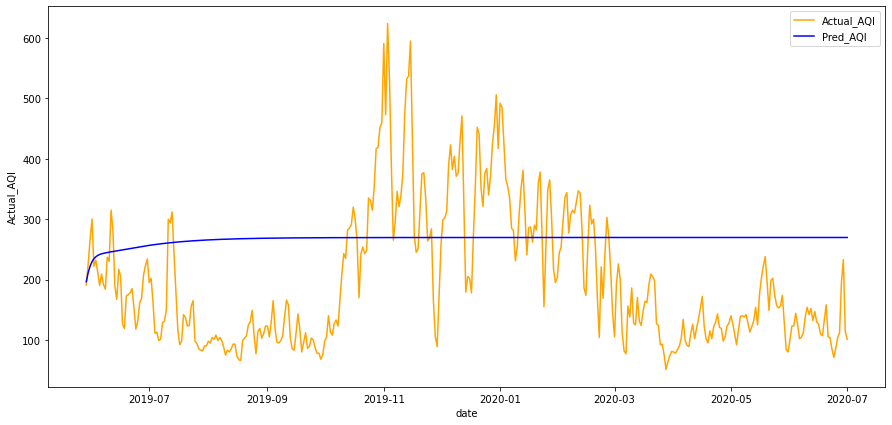

In [1004]:
data = pd.concat([test,pred], axis=1)

data = data.iloc[:, [0,1,15]]
data.columns = ['date', 'Actual_AQI','Pred_AQI']

data['Pred_AQI'] = data['Pred_AQI'].astype(float)

f, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x=data['date'], y=data['Actual_AQI'], ax=ax, color='orange', label='Actual_AQI') 
sns.lineplot(x=data['date'], y=data['Pred_AQI'], ax=ax, color='blue', label='Pred_AQI') 